### Business Case:
-FicZon Inc is an IT solution provider with products ranging from on premises products to SAAS based solutions. FicZon major leads generation channel is digital and through their website.

-FicZon business is majorly dependent on the sales force effectiveness. As the market is maturing and more new competitors entering the market, FicZon is experiencing the dip in sales.

-Effective sales is dependent on lead quality and as of now, this is based on manual categorization and highly depended on sales staff. Though there is a quality process, which continuously updates the lead categorization, it’s value is in for post analysis, rather than conversation.

-FicZon wants to explore Machine Learning to pre-categorize the lead quality and as result, expecting significant increase in sales effectiveness.

#### PROJECT GOAL:

Data exploration insights – Sales effectiveness.
ML model to predict the Lead Category (High Potential , Low Potential).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import sweetviz as sv

In [2]:
df = pd.read_csv('project_sales.csv')
df

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9.0,Call,NaN,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15.0,Call,NaN,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5.0,Live Chat-Direct,NaN,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21.0,CRM form,NaN,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


In [3]:
# Drop the irrelevant column (which are of no use in analysis)

df.drop(['Mobile'],axis=1,inplace=True)
df.drop(['EMAIL'],axis=1,inplace=True)
df

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,NaN,Website,Sales-Agent-11,NaN,Mode-5,Open
1,14-11-2018 09:22,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
2,14-11-2018 09:21,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
3,14-11-2018 08:46,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
4,14-11-2018 07:34,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9.0,Call,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15.0,Call,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5.0,Live Chat-Direct,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21.0,CRM form,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


### Domain Analysis:
Sales Effectiveness: The capacity of a company's sales representatives to "win" at every step of the customer's purchasing process and eventually secure the business on favourable terms and within the appropriate timeframe is referred to as sales effectiveness.



#### Created:

-The information on the date and timing is shown in this column.



Analysing sales effectiveness is aided by the creation of daily, weekly, or monthly sales reports.



#### Product ID:

-The product ID is shown in this column.



-A marketing program's main component is the product. The company's competitive strategy and marketing plan are determined by the products it sells.
Source:

-The sources covered in this column include calls, live chats that are direct, websites, live chats that are Google Organic, live chats that are PPC, live chats that are blogged, customer referrals, live chats that are CPC, existing clients, recommendations, live chats that are Google Ads, live chats that are Adwords Remarketing, email messages, and more.



These are the several techniques for locating sales leads.



-Inbound marketing strategies can assist the company in generating a consistent flow of incoming sales leads.



#### Sales Agent:

-A sales agent is an expert that the business employs to market goods and services while also serving as a representative of the brand.



-The sales agents Sales-Agent-12,Sales-Agent-11, Sales-Agent-10, Sales-Agent-3, Sales-Agent-4, Sales-Agent-9, Sales-Agent-7, Sales-Agent-8, and Sales-Agent-5 are mentioned in this column.






#### Location:

Companies can develop more successful sales and marketing strategies by using location analysis to target high-potential locations, benchmark sales success, and obtain insights into client behaviour.



'Bangalore' ,'Other Locations' ,'UAE', 'Trivandrum' ,'Hyderabad','Chennai' ,'UK','USA' ,'Delhi', 'Mumbai' ,'Kolkata', 'Singapore' ,'Pune','AUSTRALIA' ,'EUROPE' ,'Malaysia' ,'Howrah' are the location names that are represented in this column.



#### Delivery mode: 
-An efficient delivery strategy safeguards the goods, expedites delivery, gets to customers as soon as possible, and thus helps to not only encourage one-time purchases but also encourages recurrent ones.
"-This column discusses the various delivery modes, which include Mode-1, Mode-2, Mode-3, Mode-4, and Mode-5.

#### Status:
-It is the target (output) column that we are trying to predict the Lead Category (High Potential,Low Potential).

-It represents the different categories as:- In Progress Positive, Not Responding, Potential, Just Enquiry, Junk Lead, CONVERTED, Open, In Progress Negative, Long Term, LOST and converted.

### Basic Checks

In [4]:
df.head()

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,NaN,Website,Sales-Agent-11,NaN,Mode-5,Open
1,14-11-2018 09:22,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
2,14-11-2018 09:21,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
3,14-11-2018 08:46,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
4,14-11-2018 07:34,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open


In [5]:
df.info()        ### there are multiple columns with null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Created        7422 non-null   object 
 1   Product_ID     7364 non-null   float64
 2   Source         7405 non-null   object 
 3   Sales_Agent    7399 non-null   object 
 4   Location       7364 non-null   object 
 5   Delivery_Mode  7422 non-null   object 
 6   Status         7422 non-null   object 
dtypes: float64(1), object(6)
memory usage: 406.0+ KB


In [6]:
df.describe()

,Product_ID
count,7364.000000
mean,15.947311
std,6.072937
min,0.000000
25%,12.000000
50%,18.000000
75%,19.000000
max,28.000000


In [7]:
df.describe(include='O').T

,count,unique,top,freq
Created,7422,6752,26-09-2018 11:30,4
Source,7405,25,Call,2547
Sales_Agent,7399,12,Sales-Agent-4,1500
Location,7364,17,Other Locations,2500
Delivery_Mode,7422,5,Mode-5,2975
Status,7422,11,Junk Lead,1536


In [8]:
df.isnull().sum()                       ## there are few null values which are to be dealt in preprocessing steps.

Created           0
Product_ID       58
Source           17
Sales_Agent      23
Location         58
Delivery_Mode     0
Status            0
dtype: int64

In [9]:
df.columns

Index(['Created', 'Product_ID', 'Source', 'Sales_Agent', 'Location',
       'Delivery_Mode', 'Status'],
      dtype='object')

In [10]:
df2=df[['Source', 'Sales_Agent', 'Location',
       'Delivery_Mode', 'Status']]
df2

,Source,Sales_Agent,Location,Delivery_Mode,Status
0,Website,Sales-Agent-11,NaN,Mode-5,Open
1,Website,Sales-Agent-10,NaN,Mode-5,Open
2,Website,Sales-Agent-10,NaN,Mode-5,Open
3,Website,Sales-Agent-10,NaN,Mode-5,Open
4,Website,Sales-Agent-10,NaN,Mode-5,Open
...,...,...,...,...,...
7417,Call,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,Call,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,Live Chat-Direct,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,CRM form,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


In [11]:
for i in df2:
    print(i,df2[i].unique())
    print(df2[i].value_counts())
    print('***************************************************')

Source ['Website' nan 'Live Chat-Google Organic' 'Call' 'Live Chat-Direct'
 'By Recommendation' 'Customer Referral' 'Live Chat-Blog' 'Live Chat -PPC'
 'Live Chat-Google Ads' 'Live Chat-Adwords Remarketing' 'E-Mail Message'
 'Existing Client' 'Live Chat-CPC' 'Existing Customer' 'Live Chat-Quora'
 'US Website' 'Just Dial' 'Campaign' 'Other' 'E-mail Campaign' 'CRM form'
 'SMS Campaign' 'Personal Contact' 'Live Chat-Youtube'
 'Live Chat-Justdial']
Source
Call                             2547
Live Chat-Direct                 1834
Website                          1594
Live Chat-Google Organic          274
Live Chat -PPC                    249
Live Chat-Blog                    237
Customer Referral                 180
US Website                        137
Just Dial                          56
Existing Client                    51
Personal Contact                   50
Live Chat-CPC                      50
By Recommendation                  32
CRM form                           23
Existing Cust

In [12]:
df['Created']=pd.to_datetime(df.Created)                  # need to convert in proper form to get proper insights
df['Day']=df.Created.dt.day
df['Month']=df.Created.dt.month
df['Year']=df.Created.dt.year         
df['Hour']=df.Created.dt.hour
df['Minute']=df.Created.dt.minute
# Now drop the column name(created)

df.drop(['Created'],axis=1,inplace=True)  
df.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Year,Hour,Minute
0,NaN,Website,Sales-Agent-11,NaN,Mode-5,Open,14,11,2018,10,5
1,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open,14,11,2018,9,22
2,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open,14,11,2018,9,21
3,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open,14,11,2018,8,46
4,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open,14,11,2018,7,34


In [13]:
df.Status.unique()

array(['Open', 'Potential', 'In Progress Positive', 'Not Responding',
       'Just Enquiry', 'Junk Lead', 'CONVERTED', 'In Progress Negative',
       'LOST', 'Long Term', 'converted'], dtype=object)

In [14]:
df.Status=df.Status.map({'CONVERTED':1,'converted':1,'In Progress Positive':1,'Potential':1,'Long Term':1,'Open':1,'LOST':0,'In Progress Negative':0,'Not Responding':0,'Junk Lead':0,'Just Enquiry':0})
df.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Year,Hour,Minute
0,NaN,Website,Sales-Agent-11,NaN,Mode-5,1,14,11,2018,10,5
1,NaN,Website,Sales-Agent-10,NaN,Mode-5,1,14,11,2018,9,22
2,NaN,Website,Sales-Agent-10,NaN,Mode-5,1,14,11,2018,9,21
3,NaN,Website,Sales-Agent-10,NaN,Mode-5,1,14,11,2018,8,46
4,NaN,Website,Sales-Agent-10,NaN,Mode-5,1,14,11,2018,7,34


In [15]:
df

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Year,Hour,Minute
0,NaN,Website,Sales-Agent-11,NaN,Mode-5,1,14,11,2018,10,5
1,NaN,Website,Sales-Agent-10,NaN,Mode-5,1,14,11,2018,9,22
2,NaN,Website,Sales-Agent-10,NaN,Mode-5,1,14,11,2018,9,21
3,NaN,Website,Sales-Agent-10,NaN,Mode-5,1,14,11,2018,8,46
4,NaN,Website,Sales-Agent-10,NaN,Mode-5,1,14,11,2018,7,34
...,...,...,...,...,...,...,...,...,...,...,...
7417,9.0,Call,Sales-Agent-6,Mumbai,Mode-4,0,28,4,2018,9,45
7418,15.0,Call,Sales-Agent-12,Other Locations,Mode-5,0,28,4,2018,9,43
7419,5.0,Live Chat-Direct,Sales-Agent-11,Bangalore,Mode-1,0,28,4,2018,9,20
7420,21.0,CRM form,Sales-Agent-4,Other Locations,Mode-1,0,28,4,2018,8,4


### Visualization

In [16]:

# Syntax to use sweetviz
report = sv.analyze(df)
# Default arguments will generate to "SWEETVIZ_REPORT.html"
report.show_html()

                                             |      | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [17]:
df3=df[['Product_ID','Source', 'Sales_Agent', 'Location',
       'Delivery_Mode', 'Status']]
df3

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,NaN,Website,Sales-Agent-11,NaN,Mode-5,1
1,NaN,Website,Sales-Agent-10,NaN,Mode-5,1
2,NaN,Website,Sales-Agent-10,NaN,Mode-5,1
3,NaN,Website,Sales-Agent-10,NaN,Mode-5,1
4,NaN,Website,Sales-Agent-10,NaN,Mode-5,1
...,...,...,...,...,...,...
7417,9.0,Call,Sales-Agent-6,Mumbai,Mode-4,0
7418,15.0,Call,Sales-Agent-12,Other Locations,Mode-5,0
7419,5.0,Live Chat-Direct,Sales-Agent-11,Bangalore,Mode-1,0
7420,21.0,CRM form,Sales-Agent-4,Other Locations,Mode-1,0


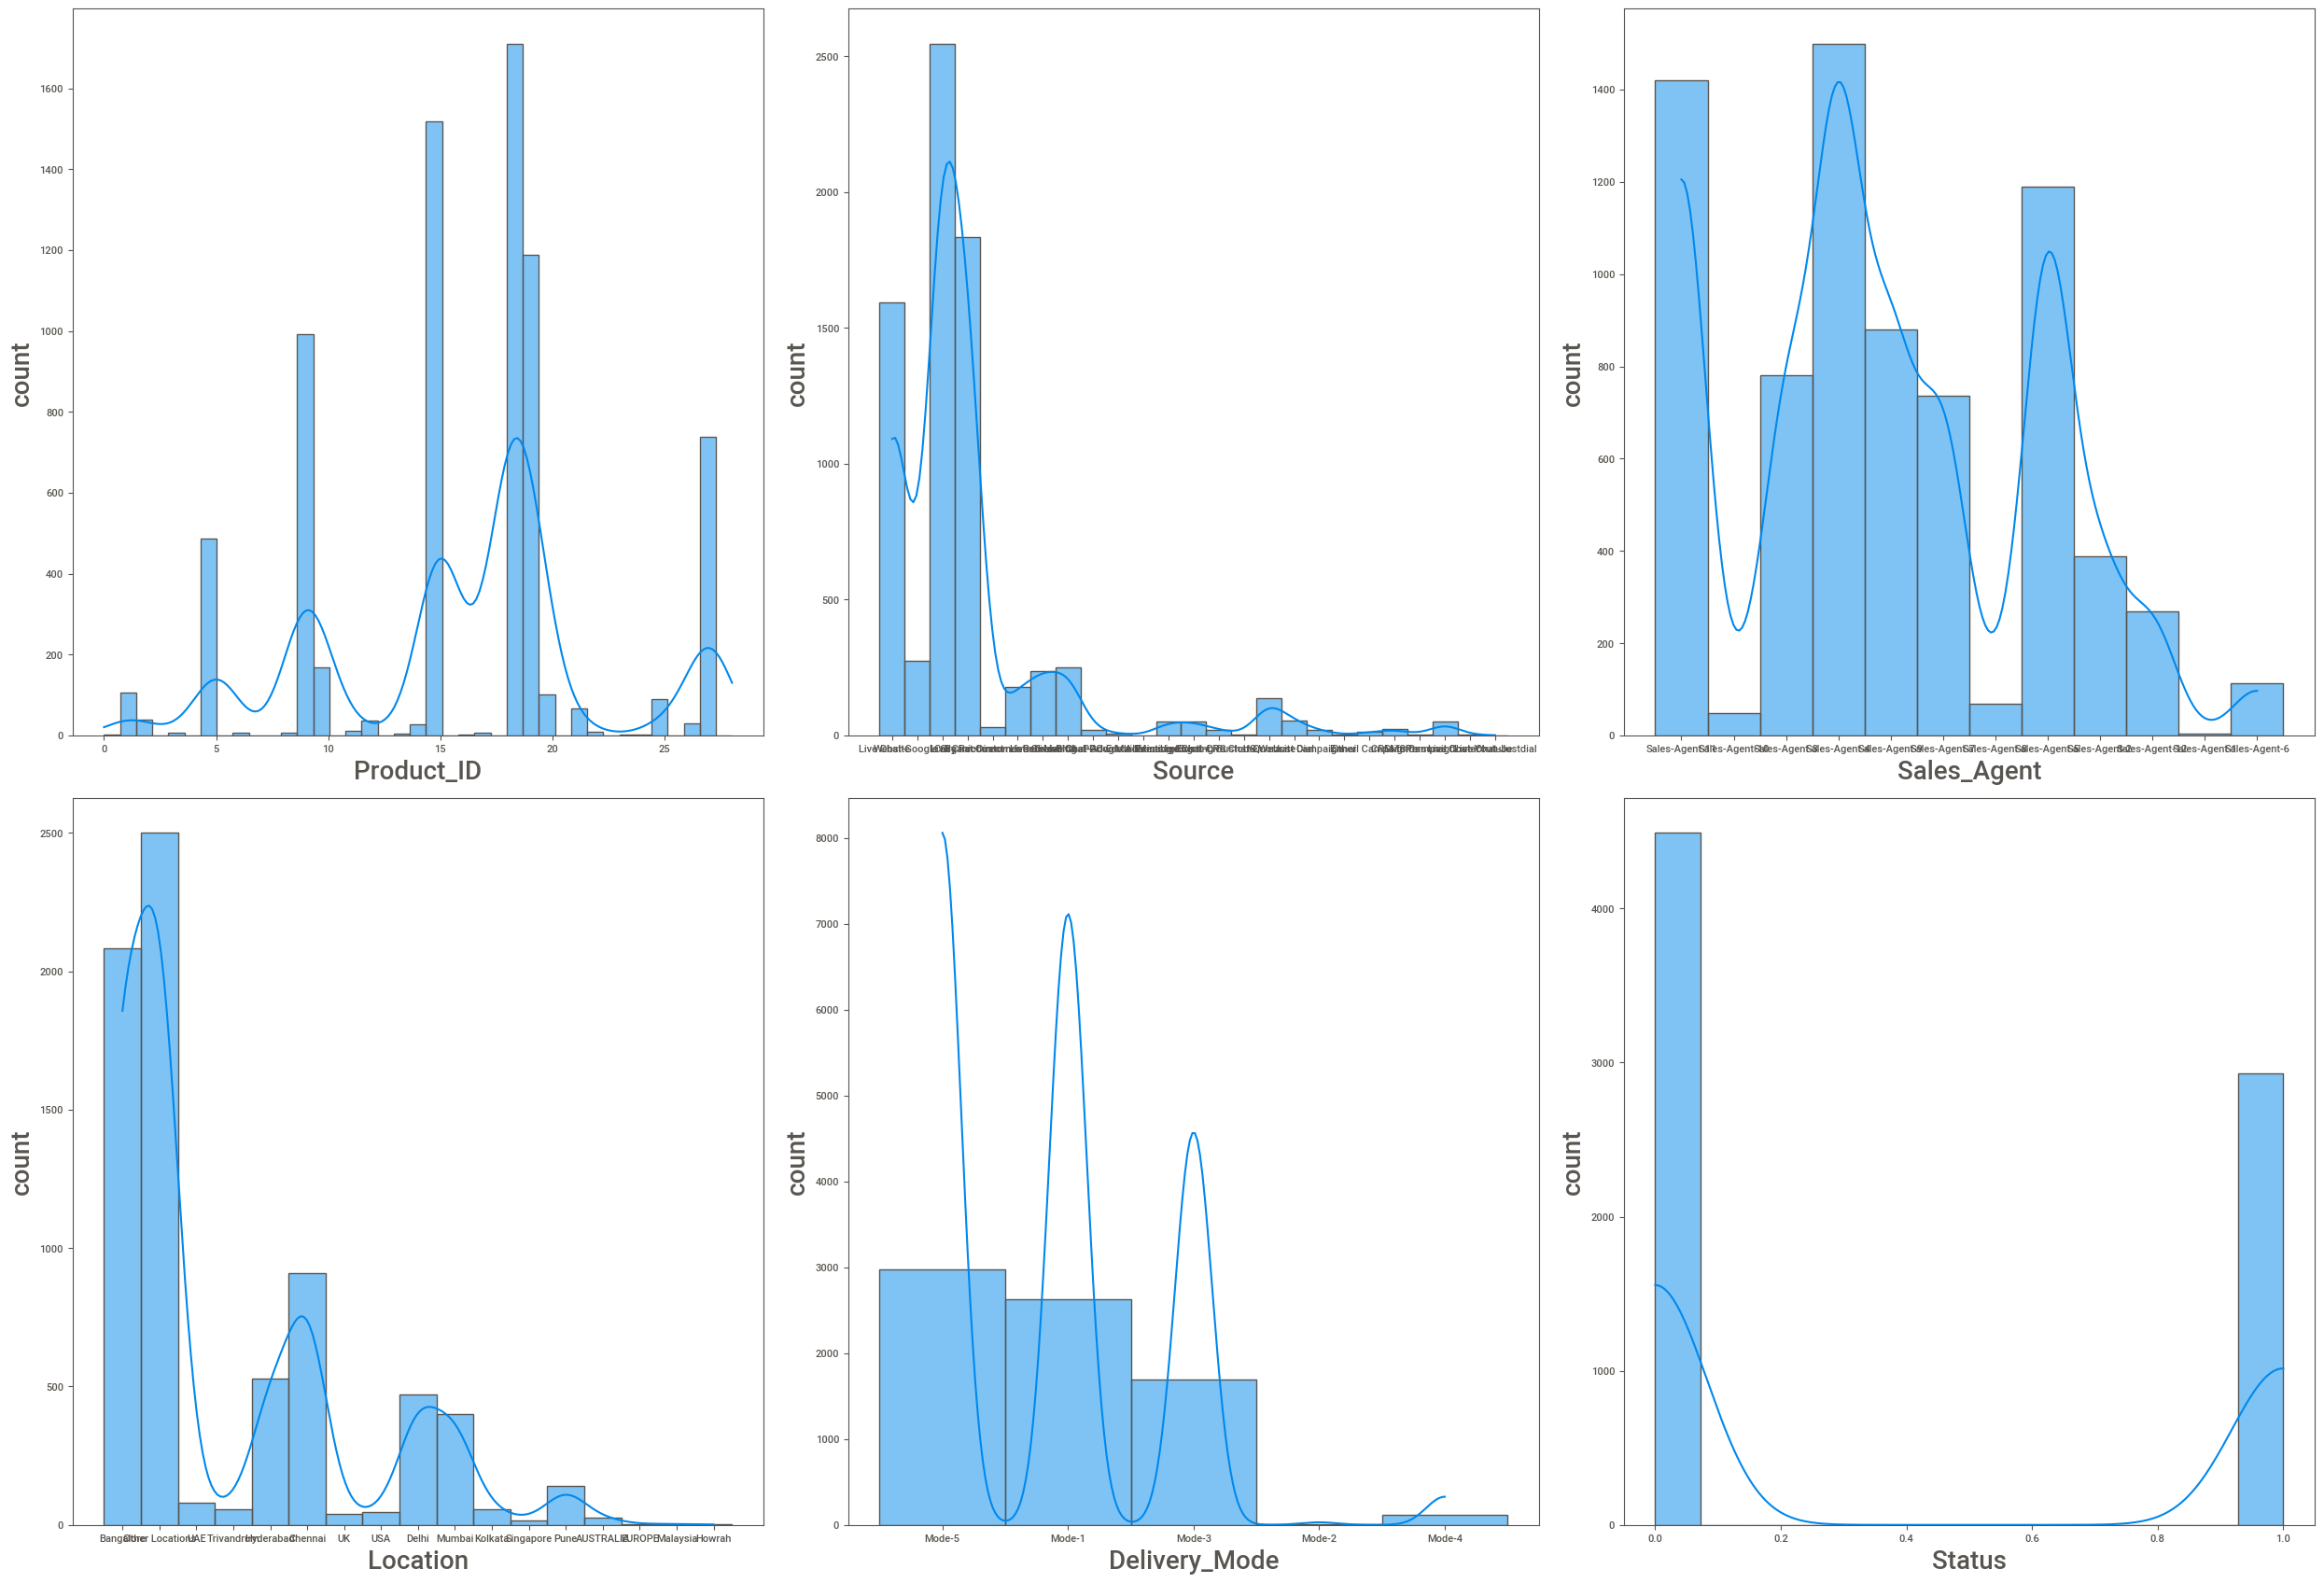

In [18]:
plt.figure(figsize=(25,25))
pltno=1
for column in df3:
    if pltno<=12:
        ax= plt.subplot(3,3,pltno)
        sns.histplot(x=df[column],kde=True)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('count',fontsize=20)
    pltno+=1
plt.tight_layout()

* Product IDs 15 and 18 represent more sales.

* Call represents the highest source of sales.

* Sales-Agent-4,11 and 5 represent the highest range.

* Other locations and Bangalore represent a higher percentage.

* Mode 5 and Mode 1 represent the highest score.

* 1 as high potential has more percentage compared to 0 as low potential.

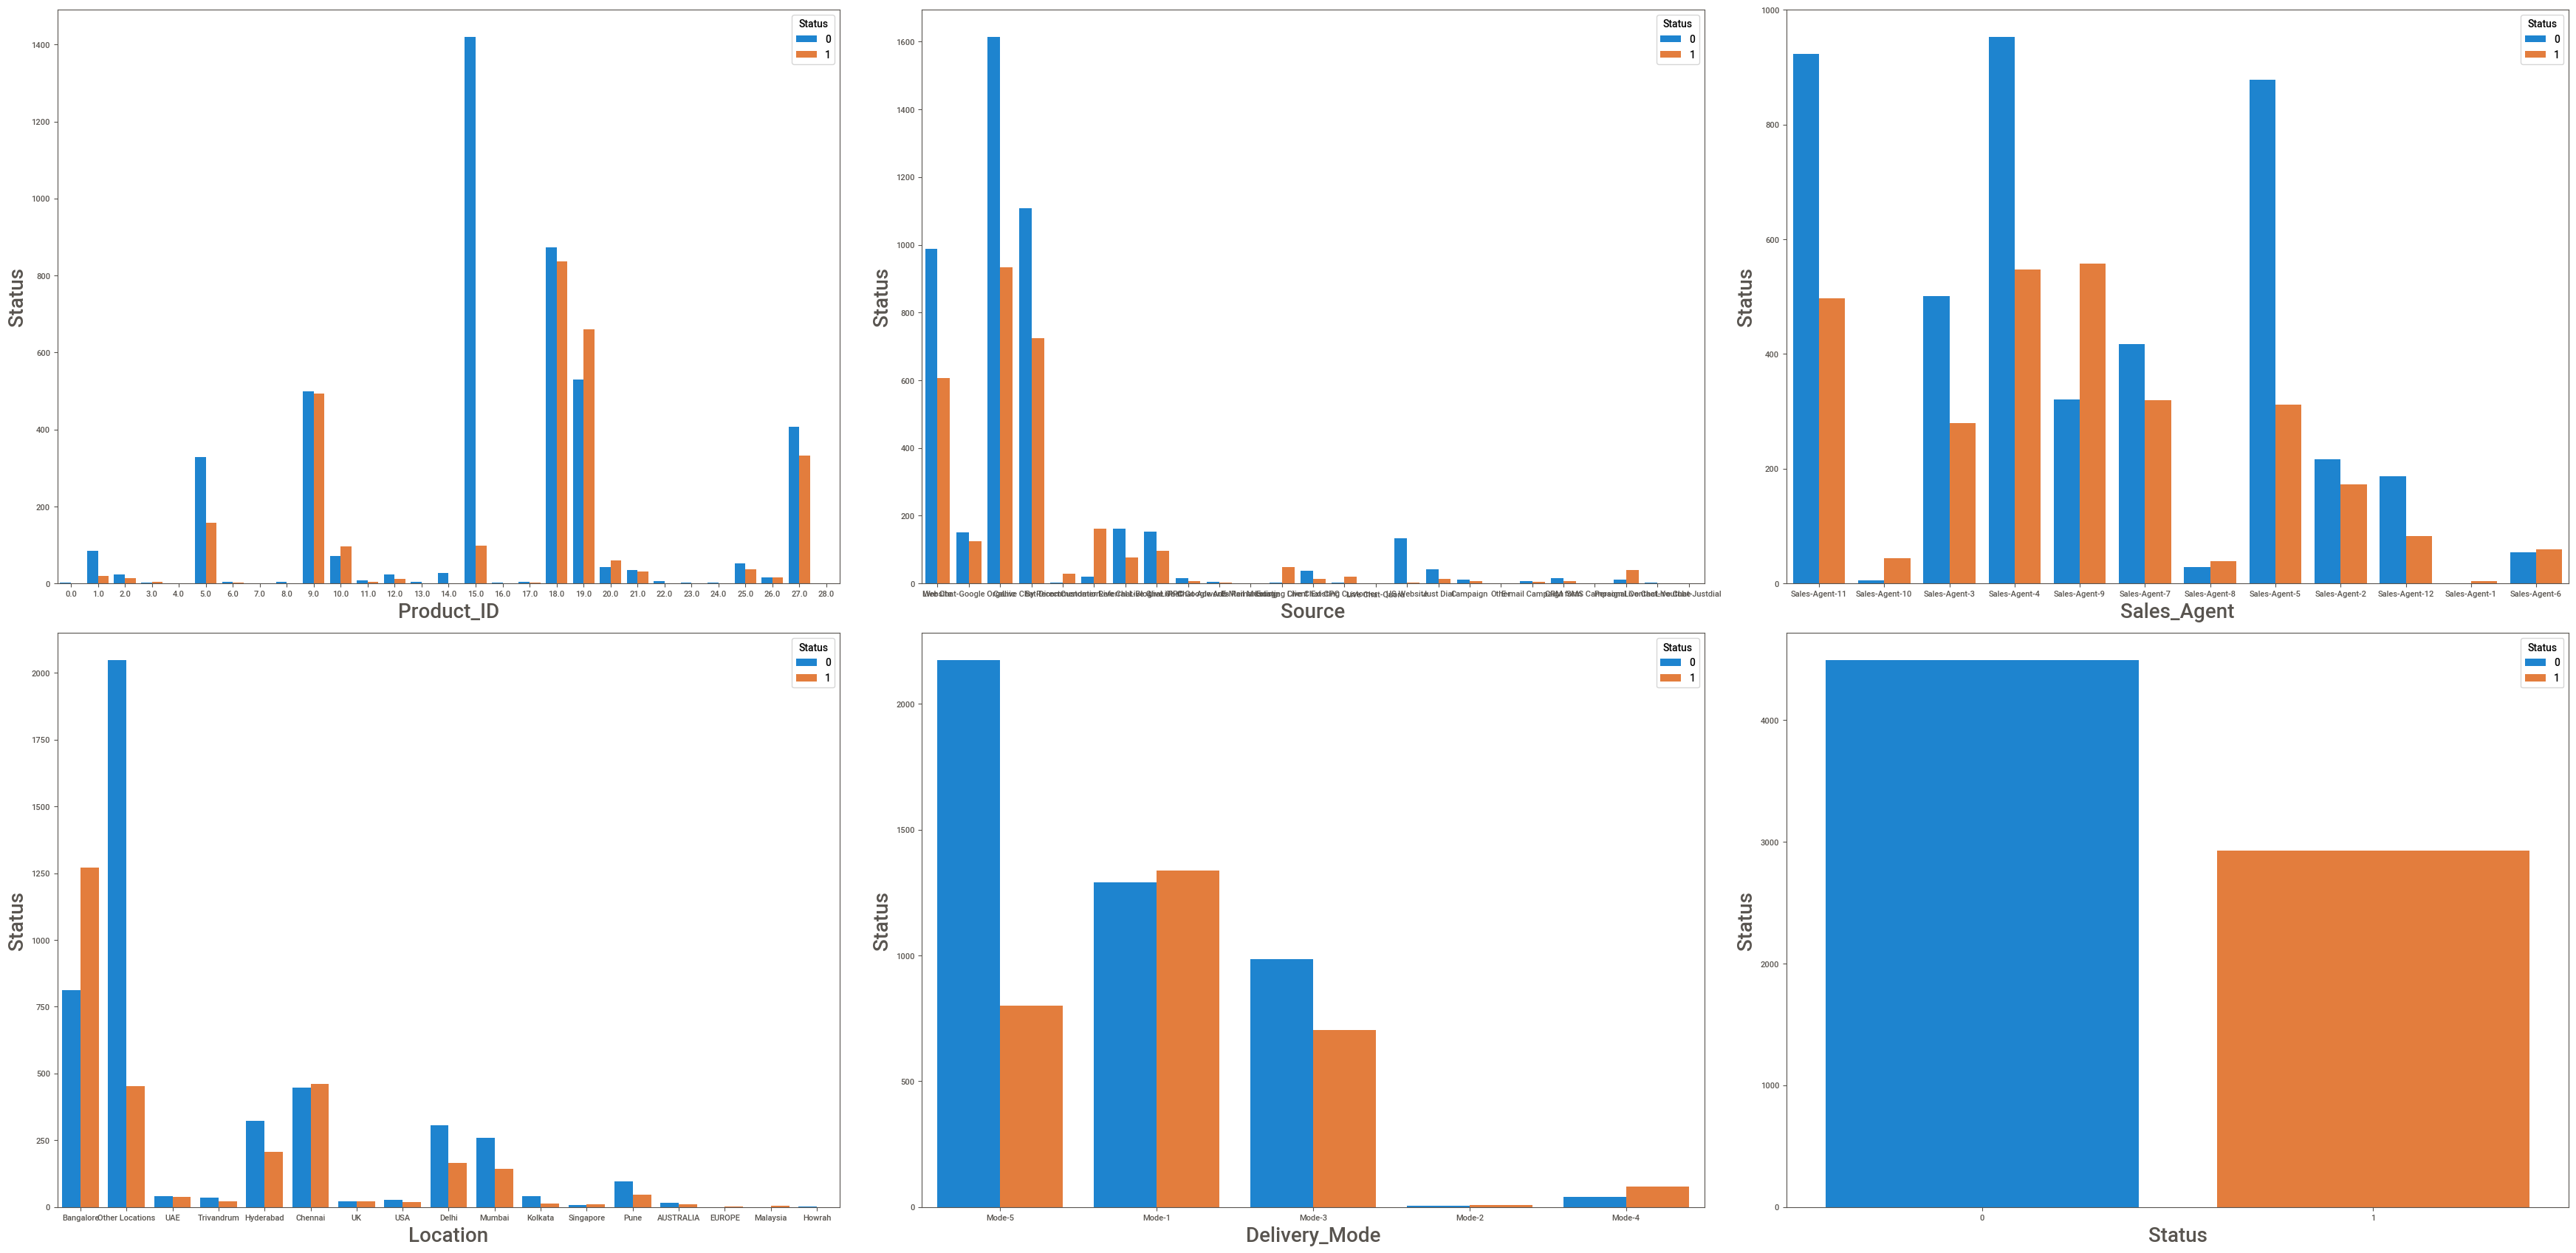

In [19]:

plt.figure(figsize=(35,25), facecolor='white')
plotnumber = 1

for column in df3:
    if plotnumber<=12 :
        aa = plt.subplot(3,3,plotnumber)
        sns.countplot(x=df[column]
                        ,hue=df.Status)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Status',fontsize=20)
    plotnumber+=1
plt.tight_layout()

* Product_ID: -Product id 15 has higher potential of sales.

* Source: -Call is the source which having high potential of sales, followed by live chat directly and website.

* Sales_Agent: -Sales agent-4 has the high potential of sales followed by Agent-11 whether sales agent-10 having the low potential of sales.

* Location: -Bangalore is the location which is having Second highest potential of sales where as other locations has the highest scope of sales.

* Delivery_Mode: Mode-5 and Mode-1 are the delivery mode having highest and second highest potential of sales respectively, where as Mode-2 is the lowest potential of sales .

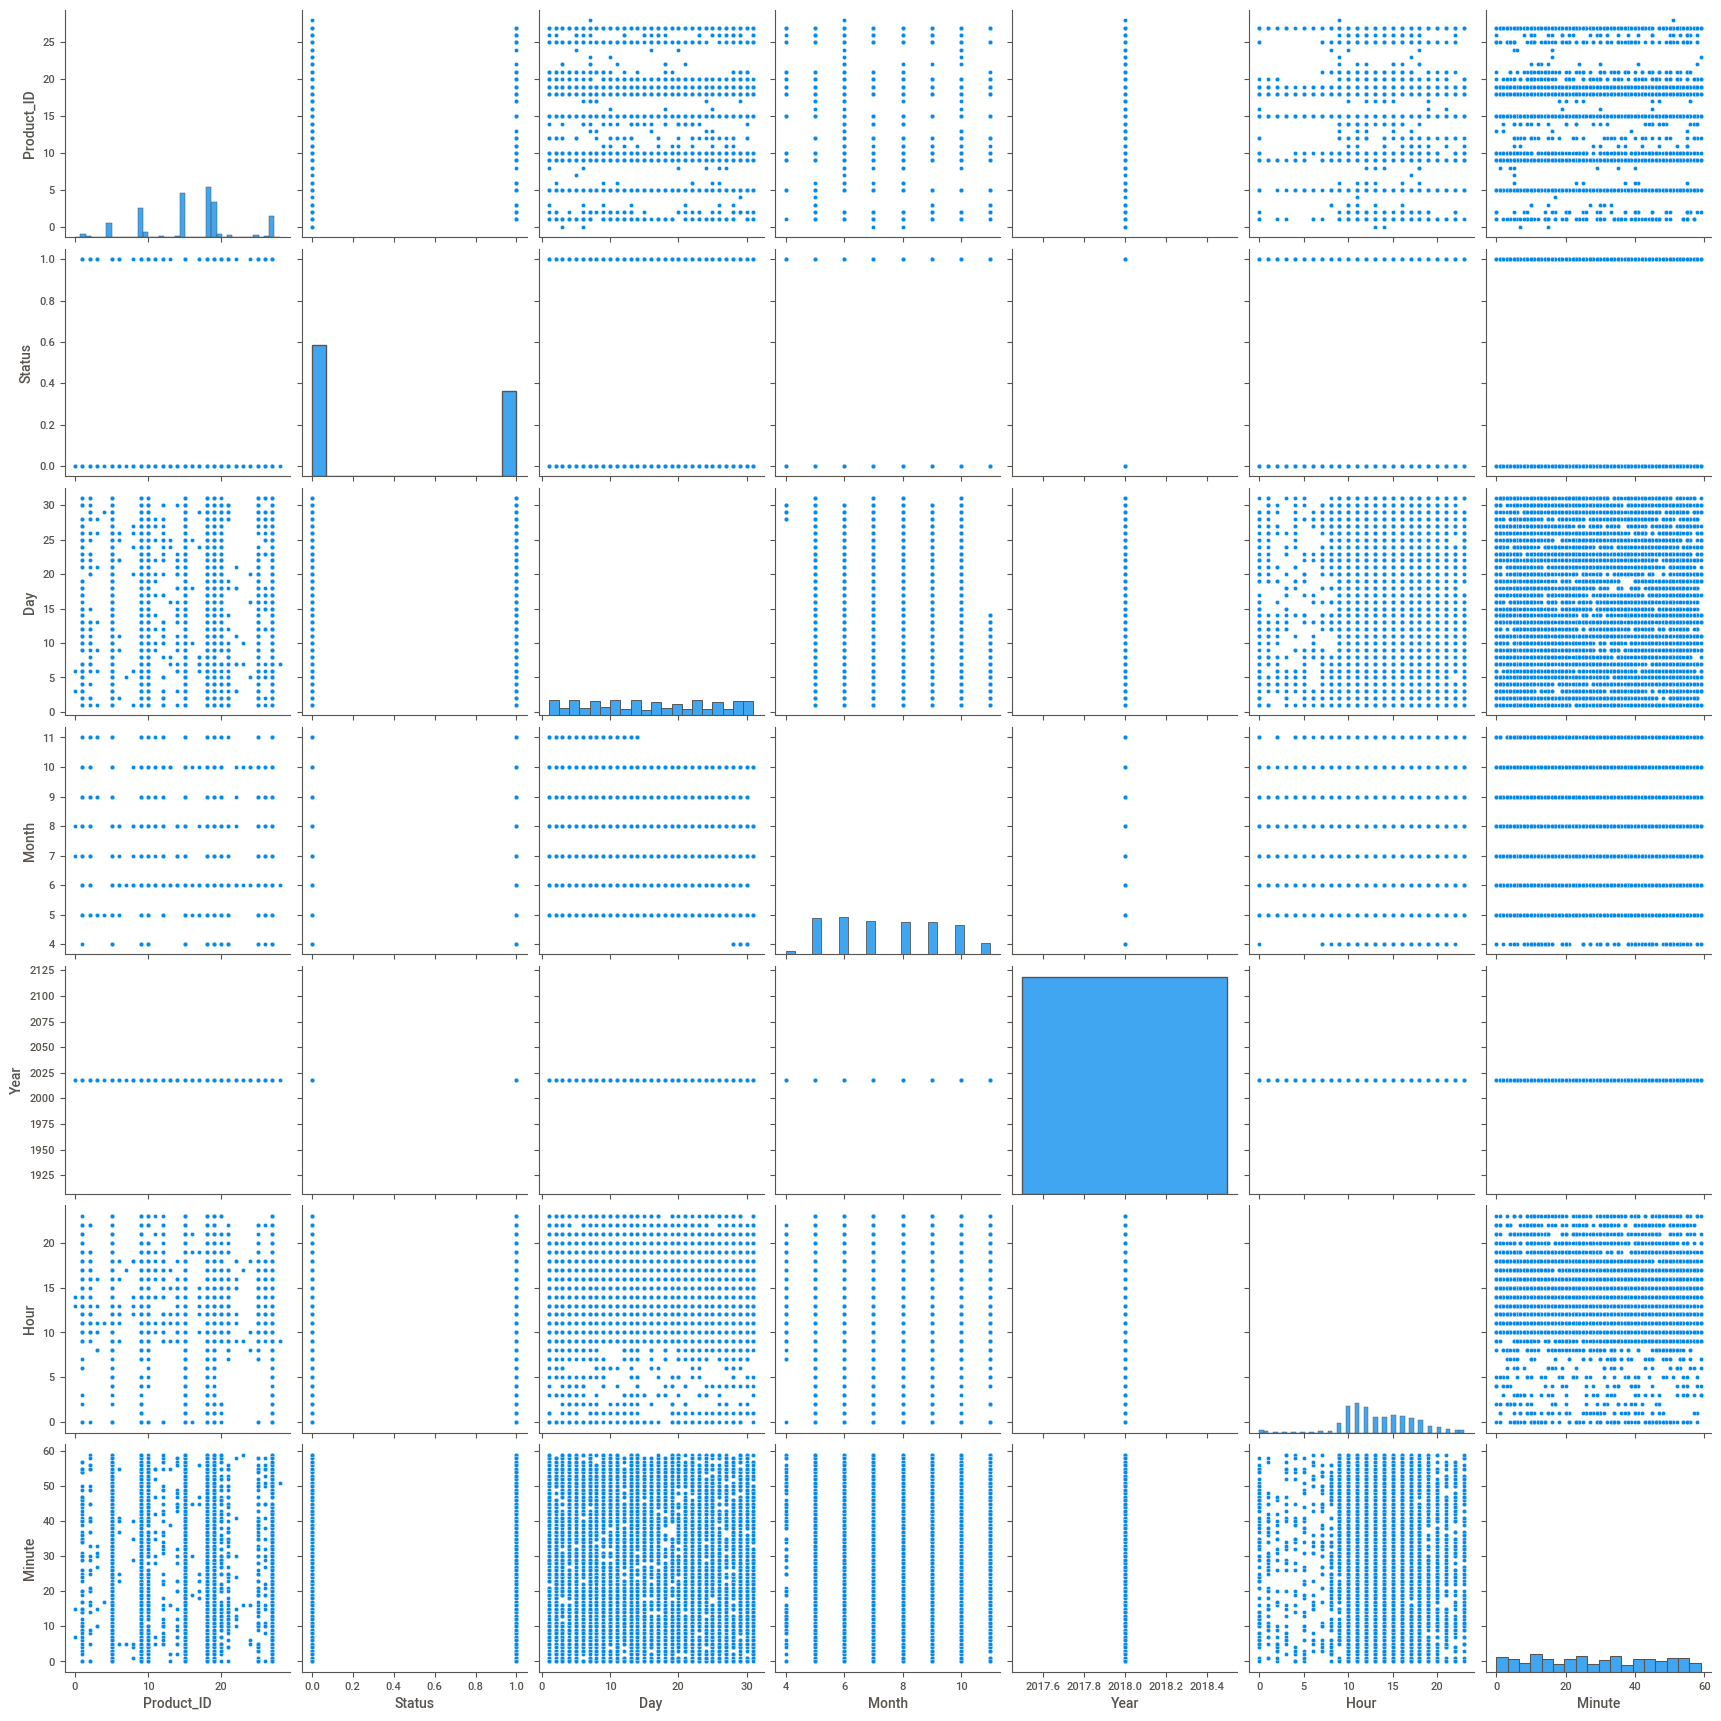

In [20]:
sns.pairplot(df)

### DATA PREPROCESSING

#### 1.) CHECKING MISSING VALUE

In [21]:
df

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Year,Hour,Minute
0,NaN,Website,Sales-Agent-11,NaN,Mode-5,1,14,11,2018,10,5
1,NaN,Website,Sales-Agent-10,NaN,Mode-5,1,14,11,2018,9,22
2,NaN,Website,Sales-Agent-10,NaN,Mode-5,1,14,11,2018,9,21
3,NaN,Website,Sales-Agent-10,NaN,Mode-5,1,14,11,2018,8,46
4,NaN,Website,Sales-Agent-10,NaN,Mode-5,1,14,11,2018,7,34
...,...,...,...,...,...,...,...,...,...,...,...
7417,9.0,Call,Sales-Agent-6,Mumbai,Mode-4,0,28,4,2018,9,45
7418,15.0,Call,Sales-Agent-12,Other Locations,Mode-5,0,28,4,2018,9,43
7419,5.0,Live Chat-Direct,Sales-Agent-11,Bangalore,Mode-1,0,28,4,2018,9,20
7420,21.0,CRM form,Sales-Agent-4,Other Locations,Mode-1,0,28,4,2018,8,4


In [22]:
df.isnull().sum()

Product_ID       58
Source           17
Sales_Agent      23
Location         58
Delivery_Mode     0
Status            0
Day               0
Month             0
Year              0
Hour              0
Minute            0
dtype: int64

In [23]:
# counting the missing values
missing = np.where(df['Product_ID'].isnull()==True)
missing

(array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
          11,   12,   13,   14,   15,   16,   17,   20,   21,   22,   23,
         126,  127,  128,  129,  130,  131,  132,  133,  134,  135,  136,
         137,  138, 1888, 2487, 2488, 2489, 2556, 2726, 2727, 2729, 3023,
        3051, 3053, 3061, 3130, 3250, 3384, 3740, 3752, 4979, 5086, 5235,
        5258, 5549, 5664]),)

In [24]:
missing_2 = np.where(df['Source'].isnull()==True)
missing_2

(array([  13,   15,   21,  128,  138, 2518, 2556, 2686, 2712, 2767, 3051,
        4979, 5258, 5549, 6627, 6886, 6910]),)

In [25]:
missing_3 = np.where(df['Sales_Agent'].isnull()==True)
missing_3

(array([ 118,  593,  651,  658,  681,  690,  691,  884, 1109, 1490, 1734,
        2946, 3987, 4080, 4229, 4375, 5321, 5780, 5784, 5901, 6957, 7099,
        7101]),)

In [26]:
missing_4 = np.where(df['Location'].isnull()==True)
missing_4

(array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
          11,   12,   13,   14,   15,   16,   17,   20,   21,   22,  126,
         127,  128,  129,  130,  131,  132,  133,  134,  135,  136,  137,
         138, 2487, 2488, 2489, 2556, 2726, 2727, 2729, 3051, 3053, 3061,
        3130, 3250, 3373, 3384, 3435, 3740, 4461, 4979, 5235, 5258, 5549,
        5917, 7001, 7301]),)

In [27]:
# getting the actual data from the index
df.iloc[missing]

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Year,Hour,Minute
0,NaN,Website,Sales-Agent-11,NaN,Mode-5,1,14,11,2018,10,5
1,NaN,Website,Sales-Agent-10,NaN,Mode-5,1,14,11,2018,9,22
2,NaN,Website,Sales-Agent-10,NaN,Mode-5,1,14,11,2018,9,21
3,NaN,Website,Sales-Agent-10,NaN,Mode-5,1,14,11,2018,8,46
4,NaN,Website,Sales-Agent-10,NaN,Mode-5,1,14,11,2018,7,34
5,NaN,Website,Sales-Agent-10,NaN,Mode-5,1,14,11,2018,7,33
6,NaN,Website,Sales-Agent-10,NaN,Mode-5,1,14,11,2018,5,58
7,NaN,Website,Sales-Agent-10,NaN,Mode-5,1,14,11,2018,5,49
8,NaN,Website,Sales-Agent-10,NaN,Mode-5,1,14,11,2018,5,40
9,NaN,Website,Sales-Agent-10,NaN,Mode-5,1,14,11,2018,5,6


In [28]:
df.iloc[missing_2]

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Year,Hour,Minute
13,NaN,NaN,Sales-Agent-10,NaN,Mode-5,1,13,11,2018,23,40
15,NaN,NaN,Sales-Agent-10,NaN,Mode-5,1,13,11,2018,20,45
21,NaN,NaN,Sales-Agent-10,NaN,Mode-5,1,13,11,2018,18,25
128,NaN,NaN,Sales-Agent-10,NaN,Mode-5,1,10,11,2018,20,40
138,NaN,NaN,Sales-Agent-10,NaN,Mode-5,1,10,11,2018,18,0
2518,18.0,NaN,Sales-Agent-5,Other Locations,Mode-3,0,30,8,2018,20,40
2556,NaN,NaN,Sales-Agent-1,NaN,Mode-5,1,29,8,2018,19,41
2686,9.0,NaN,Sales-Agent-5,Mumbai,Mode-3,0,26,8,2018,11,10
2712,15.0,NaN,Sales-Agent-5,Mumbai,Mode-5,0,25,8,2018,10,0
2767,15.0,NaN,Sales-Agent-11,Hyderabad,Mode-5,0,23,8,2018,14,40


In [29]:
df.iloc[missing_3]

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Year,Hour,Minute
118,5.0,Live Chat-Google Ads,NaN,Other Locations,Mode-5,1,11,11,2018,12,35
593,15.0,Live Chat-Direct,NaN,Other Locations,Mode-5,1,25,10,2018,18,2
651,18.0,Website,NaN,Delhi,Mode-5,0,24,10,2018,11,1
658,17.0,Live Chat-Google Organic,NaN,UAE,Mode-3,1,24,10,2018,10,18
681,15.0,Live Chat-Google Organic,NaN,Other Locations,Mode-3,1,23,10,2018,12,9
690,15.0,Call,NaN,Other Locations,Mode-5,1,23,10,2018,11,33
691,15.0,Call,NaN,Other Locations,Mode-5,0,23,10,2018,11,31
884,24.0,Call,NaN,Other Locations,Mode-1,1,16,10,2018,10,6
1109,18.0,Live Chat-Direct,NaN,Bangalore,Mode-1,1,9,10,2018,12,55
1490,15.0,Call,NaN,Other Locations,Mode-5,1,27,9,2018,11,0


In [30]:
df.iloc[missing_4]

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Year,Hour,Minute
0,NaN,Website,Sales-Agent-11,NaN,Mode-5,1,14,11,2018,10,5
1,NaN,Website,Sales-Agent-10,NaN,Mode-5,1,14,11,2018,9,22
2,NaN,Website,Sales-Agent-10,NaN,Mode-5,1,14,11,2018,9,21
3,NaN,Website,Sales-Agent-10,NaN,Mode-5,1,14,11,2018,8,46
4,NaN,Website,Sales-Agent-10,NaN,Mode-5,1,14,11,2018,7,34
5,NaN,Website,Sales-Agent-10,NaN,Mode-5,1,14,11,2018,7,33
6,NaN,Website,Sales-Agent-10,NaN,Mode-5,1,14,11,2018,5,58
7,NaN,Website,Sales-Agent-10,NaN,Mode-5,1,14,11,2018,5,49
8,NaN,Website,Sales-Agent-10,NaN,Mode-5,1,14,11,2018,5,40
9,NaN,Website,Sales-Agent-10,NaN,Mode-5,1,14,11,2018,5,6


In [31]:
# 1.) Product ID  
# use mode because of less product id as well as most frequent no.
df.Product_ID.mode()

0    18.0
Name: Product_ID, dtype: float64

In [32]:
df.Product_ID.value_counts()

Product_ID
18.0    1711
15.0    1518
19.0    1189
9.0      992
27.0     739
5.0      487
10.0     168
1.0      105
20.0     102
25.0      90
21.0      66
2.0       38
12.0      36
26.0      31
14.0      27
11.0      12
22.0       8
3.0        7
17.0       7
6.0        7
8.0        6
13.0       5
24.0       3
16.0       3
23.0       2
0.0        2
28.0       1
7.0        1
4.0        1
Name: count, dtype: int64

In [33]:
df.loc[df['Product_ID'].isnull()==True,'Product_ID']= 18.0

In [34]:
# 2.) Source 
# impute with mode because of categorical feature
df.Source.mode()

0    Call
Name: Source, dtype: object

In [35]:
df.Source.value_counts()

Source
Call                             2547
Live Chat-Direct                 1834
Website                          1594
Live Chat-Google Organic          274
Live Chat -PPC                    249
Live Chat-Blog                    237
Customer Referral                 180
US Website                        137
Just Dial                          56
Existing Client                    51
Personal Contact                   50
Live Chat-CPC                      50
By Recommendation                  32
CRM form                           23
Existing Customer                  22
Live Chat-Google Ads               21
Campaign                           19
E-mail Campaign                    12
Live Chat-Adwords Remarketing       7
Live Chat-Quora                     2
Other                               2
SMS Campaign                        2
Live Chat-Youtube                   2
E-Mail Message                      1
Live Chat-Justdial                  1
Name: count, dtype: int64

In [36]:
df.loc[df['Source'].isnull()==True,'Source']= 'Call'

In [37]:
# 3.) Sales agent 
# impute with mode because of categorical feature
df.Sales_Agent.mode()

0    Sales-Agent-4
Name: Sales_Agent, dtype: object

In [38]:
df.Sales_Agent.value_counts()

Sales_Agent
Sales-Agent-4     1500
Sales-Agent-11    1420
Sales-Agent-5     1190
Sales-Agent-9      879
Sales-Agent-3      781
Sales-Agent-7      736
Sales-Agent-2      389
Sales-Agent-12     269
Sales-Agent-6      114
Sales-Agent-8       68
Sales-Agent-10      49
Sales-Agent-1        4
Name: count, dtype: int64

In [39]:
df.loc[df['Sales_Agent'].isnull()==True,'Sales_Agent']= 'SalesAgent4'

In [40]:
# 4.) Location 
# impute with mode because of categorical feature
df.Location.mode()

0    Other Locations
Name: Location, dtype: object

In [41]:
df.loc[df['Location'].isnull()==True,'Location']= 'Other Locations'

In [42]:
# Checking missing value after imputation
df.isnull().sum()

Product_ID       0
Source           0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
Day              0
Month            0
Year             0
Hour             0
Minute           0
dtype: int64

In [43]:
df

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Year,Hour,Minute
0,18.0,Website,Sales-Agent-11,Other Locations,Mode-5,1,14,11,2018,10,5
1,18.0,Website,Sales-Agent-10,Other Locations,Mode-5,1,14,11,2018,9,22
2,18.0,Website,Sales-Agent-10,Other Locations,Mode-5,1,14,11,2018,9,21
3,18.0,Website,Sales-Agent-10,Other Locations,Mode-5,1,14,11,2018,8,46
4,18.0,Website,Sales-Agent-10,Other Locations,Mode-5,1,14,11,2018,7,34
...,...,...,...,...,...,...,...,...,...,...,...
7417,9.0,Call,Sales-Agent-6,Mumbai,Mode-4,0,28,4,2018,9,45
7418,15.0,Call,Sales-Agent-12,Other Locations,Mode-5,0,28,4,2018,9,43
7419,5.0,Live Chat-Direct,Sales-Agent-11,Bangalore,Mode-1,0,28,4,2018,9,20
7420,21.0,CRM form,Sales-Agent-4,Other Locations,Mode-1,0,28,4,2018,8,4


In [44]:
df.describe()

,Product_ID,Status,Day,Month,Year,Hour,Minute
count,7422.000000,7422.000000,7422.000000,7422.000000,7422.0,7422.000000,7422.000000
mean,15.963352,0.394907,15.647939,7.499461,2018.0,13.332794,28.617084
std,6.051858,0.488864,9.040559,1.877802,0.0,4.055603,17.300034
min,0.000000,0.000000,1.000000,4.000000,2018.0,0.000000,0.000000
25%,12.000000,0.000000,8.000000,6.000000,2018.0,11.000000,13.000000
50%,18.000000,0.000000,15.000000,7.000000,2018.0,13.000000,29.000000
75%,19.000000,1.000000,23.000000,9.000000,2018.0,16.000000,45.000000
max,28.000000,1.000000,31.000000,11.000000,2018.0,23.000000,59.000000


#### 2.) checking for duplicated value

In [45]:
df.duplicated().sum()

27

In [46]:
# drop duplicate value
df = df.drop_duplicates()
df

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Year,Hour,Minute
0,18.0,Website,Sales-Agent-11,Other Locations,Mode-5,1,14,11,2018,10,5
1,18.0,Website,Sales-Agent-10,Other Locations,Mode-5,1,14,11,2018,9,22
2,18.0,Website,Sales-Agent-10,Other Locations,Mode-5,1,14,11,2018,9,21
3,18.0,Website,Sales-Agent-10,Other Locations,Mode-5,1,14,11,2018,8,46
4,18.0,Website,Sales-Agent-10,Other Locations,Mode-5,1,14,11,2018,7,34
...,...,...,...,...,...,...,...,...,...,...,...
7417,9.0,Call,Sales-Agent-6,Mumbai,Mode-4,0,28,4,2018,9,45
7418,15.0,Call,Sales-Agent-12,Other Locations,Mode-5,0,28,4,2018,9,43
7419,5.0,Live Chat-Direct,Sales-Agent-11,Bangalore,Mode-1,0,28,4,2018,9,20
7420,21.0,CRM form,Sales-Agent-4,Other Locations,Mode-1,0,28,4,2018,8,4


In [47]:
df.duplicated().sum()

0

#### 3.) Convert Categorical data into Numerical data

In [48]:
df.describe(include='O').T

,count,unique,top,freq
Source,7395,25,Call,2540
Sales_Agent,7395,13,Sales-Agent-4,1493
Location,7395,17,Other Locations,2532
Delivery_Mode,7395,5,Mode-5,2948


In [49]:
# Using Manual Incoder covert data

In [50]:
# 1.) Source
df.Source.unique()

array(['Website', 'Call', 'Live Chat-Google Organic', 'Live Chat-Direct',
       'By Recommendation', 'Customer Referral', 'Live Chat-Blog',
       'Live Chat -PPC', 'Live Chat-Google Ads',
       'Live Chat-Adwords Remarketing', 'E-Mail Message',
       'Existing Client', 'Live Chat-CPC', 'Existing Customer',
       'Live Chat-Quora', 'US Website', 'Just Dial', 'Campaign', 'Other',
       'E-mail Campaign', 'CRM form', 'SMS Campaign', 'Personal Contact',
       'Live Chat-Youtube', 'Live Chat-Justdial'], dtype=object)

In [51]:
df.Source.value_counts()

Source
Call                             2540
Live Chat-Direct                 1834
Website                          1592
Live Chat-Google Organic          274
Live Chat -PPC                    249
Live Chat-Blog                    237
Customer Referral                 179
US Website                        137
Just Dial                          56
Existing Client                    51
Personal Contact                   50
Live Chat-CPC                      50
By Recommendation                  32
CRM form                           23
Existing Customer                  22
Live Chat-Google Ads               21
Campaign                           19
E-mail Campaign                    12
Live Chat-Adwords Remarketing       7
Live Chat-Quora                     2
Other                               2
SMS Campaign                        2
Live Chat-Youtube                   2
E-Mail Message                      1
Live Chat-Justdial                  1
Name: count, dtype: int64

In [52]:
df.Source=df.Source.map({'Call':24,'Live Chat-Direct':23,'Website':22,'Live Chat-Google Organic':21,'Live Chat -PPC':20,'Live Chat-Blog':19,'Customer Referral':18,'US Website':17,'Just Dial':16,'Existing Client':15,'Personal Contact':14,'Live Chat-CPC':13,'By Recommendation':12,'CRM form':11,'Existing Customer':10,'Live Chat-Google Ads':9,'Campaign':8,'E-mail Campaign':7,'Live Chat-Adwords Remarketing':6,'Live Chat-Quora':5,'Other':4,'SMS Campaign':3,'Live Chat-Youtube':2,'E-Mail Message':1,'Live Chat-Justdial':0})

In [53]:
df

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Year,Hour,Minute
0,18.0,22,Sales-Agent-11,Other Locations,Mode-5,1,14,11,2018,10,5
1,18.0,22,Sales-Agent-10,Other Locations,Mode-5,1,14,11,2018,9,22
2,18.0,22,Sales-Agent-10,Other Locations,Mode-5,1,14,11,2018,9,21
3,18.0,22,Sales-Agent-10,Other Locations,Mode-5,1,14,11,2018,8,46
4,18.0,22,Sales-Agent-10,Other Locations,Mode-5,1,14,11,2018,7,34
...,...,...,...,...,...,...,...,...,...,...,...
7417,9.0,24,Sales-Agent-6,Mumbai,Mode-4,0,28,4,2018,9,45
7418,15.0,24,Sales-Agent-12,Other Locations,Mode-5,0,28,4,2018,9,43
7419,5.0,23,Sales-Agent-11,Bangalore,Mode-1,0,28,4,2018,9,20
7420,21.0,11,Sales-Agent-4,Other Locations,Mode-1,0,28,4,2018,8,4


In [54]:
# 2.) Sales_Agent
df.Sales_Agent.unique()

array(['Sales-Agent-11', 'Sales-Agent-10', 'Sales-Agent-3',
       'Sales-Agent-4', 'Sales-Agent-9', 'Sales-Agent-7', 'SalesAgent4',
       'Sales-Agent-8', 'Sales-Agent-5', 'Sales-Agent-2',
       'Sales-Agent-12', 'Sales-Agent-1', 'Sales-Agent-6'], dtype=object)

In [55]:
df.Sales_Agent.value_counts()

Sales_Agent
Sales-Agent-4     1493
Sales-Agent-11    1417
Sales-Agent-5     1183
Sales-Agent-9      875
Sales-Agent-3      777
Sales-Agent-7      736
Sales-Agent-2      389
Sales-Agent-12     269
Sales-Agent-6      114
Sales-Agent-8       68
Sales-Agent-10      47
SalesAgent4         23
Sales-Agent-1        4
Name: count, dtype: int64

In [56]:
df.Sales_Agent=df.Sales_Agent.map({'Sales-Agent-4':12,'Sales-Agent-11':11,'Sales-Agent-5':10,'Sales-Agent-9':9,'Sales-Agent-3':8,'Sales-Agent-7':7,'Sales-Agent-2':6,'Sales-Agent-12':5,'Sales-Agent-6':4,'Sales-Agent-8':3,'Sales-Agent-10':2,'SalesAgent4':1,'Sales-Agent-1':0})

In [57]:
df

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Year,Hour,Minute
0,18.0,22,11,Other Locations,Mode-5,1,14,11,2018,10,5
1,18.0,22,2,Other Locations,Mode-5,1,14,11,2018,9,22
2,18.0,22,2,Other Locations,Mode-5,1,14,11,2018,9,21
3,18.0,22,2,Other Locations,Mode-5,1,14,11,2018,8,46
4,18.0,22,2,Other Locations,Mode-5,1,14,11,2018,7,34
...,...,...,...,...,...,...,...,...,...,...,...
7417,9.0,24,4,Mumbai,Mode-4,0,28,4,2018,9,45
7418,15.0,24,5,Other Locations,Mode-5,0,28,4,2018,9,43
7419,5.0,23,11,Bangalore,Mode-1,0,28,4,2018,9,20
7420,21.0,11,12,Other Locations,Mode-1,0,28,4,2018,8,4


In [58]:
# 3.) Location
df.Location.unique()

array(['Other Locations', 'Bangalore', 'UAE', 'Trivandrum', 'Hyderabad',
       'Chennai', 'UK', 'USA', 'Delhi', 'Mumbai', 'Kolkata', 'Singapore',
       'Pune', 'AUSTRALIA', 'EUROPE', 'Malaysia', 'Howrah'], dtype=object)

In [59]:
df.Location.value_counts()

Location
Other Locations    2532
Bangalore          2083
Chennai             909
Hyderabad           528
Delhi               471
Mumbai              402
Pune                142
UAE                  79
Trivandrum           58
Kolkata              55
USA                  45
UK                   41
AUSTRALIA            25
Singapore            17
Malaysia              4
EUROPE                3
Howrah                1
Name: count, dtype: int64

In [60]:
df.Location=df.Location.map({'Other Locations':16,'Bangalore':15,'Chennai':14,'Hyderabad':13,'Delhi':12,'Mumbai':11,'Pune':10,'UAE':9,'Trivandrum':8,'Kolkata':7,'USA':6,'UK':5,'AUSTRALIA':4,'Singapore':3,'Malaysia':2,'EUROPE':1,'Howrah':0})

In [61]:
df

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Year,Hour,Minute
0,18.0,22,11,16,Mode-5,1,14,11,2018,10,5
1,18.0,22,2,16,Mode-5,1,14,11,2018,9,22
2,18.0,22,2,16,Mode-5,1,14,11,2018,9,21
3,18.0,22,2,16,Mode-5,1,14,11,2018,8,46
4,18.0,22,2,16,Mode-5,1,14,11,2018,7,34
...,...,...,...,...,...,...,...,...,...,...,...
7417,9.0,24,4,11,Mode-4,0,28,4,2018,9,45
7418,15.0,24,5,16,Mode-5,0,28,4,2018,9,43
7419,5.0,23,11,15,Mode-1,0,28,4,2018,9,20
7420,21.0,11,12,16,Mode-1,0,28,4,2018,8,4


In [62]:
# 5.) Delivery_Mode
df.Delivery_Mode.unique()

array(['Mode-5', 'Mode-1', 'Mode-3', 'Mode-2', 'Mode-4'], dtype=object)

In [63]:
df.Delivery_Mode.value_counts()

Delivery_Mode
Mode-5    2948
Mode-1    2627
Mode-3    1688
Mode-4     121
Mode-2      11
Name: count, dtype: int64

In [64]:
df.Delivery_Mode=df.Delivery_Mode.map({'Mode-5':4,'Mode-1':3,'Mode-3':2,'Mode-4':1,'Mode-2':0})

In [65]:
df

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Year,Hour,Minute
0,18.0,22,11,16,4,1,14,11,2018,10,5
1,18.0,22,2,16,4,1,14,11,2018,9,22
2,18.0,22,2,16,4,1,14,11,2018,9,21
3,18.0,22,2,16,4,1,14,11,2018,8,46
4,18.0,22,2,16,4,1,14,11,2018,7,34
...,...,...,...,...,...,...,...,...,...,...,...
7417,9.0,24,4,11,1,0,28,4,2018,9,45
7418,15.0,24,5,16,4,0,28,4,2018,9,43
7419,5.0,23,11,15,3,0,28,4,2018,9,20
7420,21.0,11,12,16,3,0,28,4,2018,8,4


#### 4.) Handle Outlier

In [66]:
df.columns

Index(['Product_ID', 'Source', 'Sales_Agent', 'Location', 'Delivery_Mode',
       'Status', 'Day', 'Month', 'Year', 'Hour', 'Minute'],
      dtype='object')

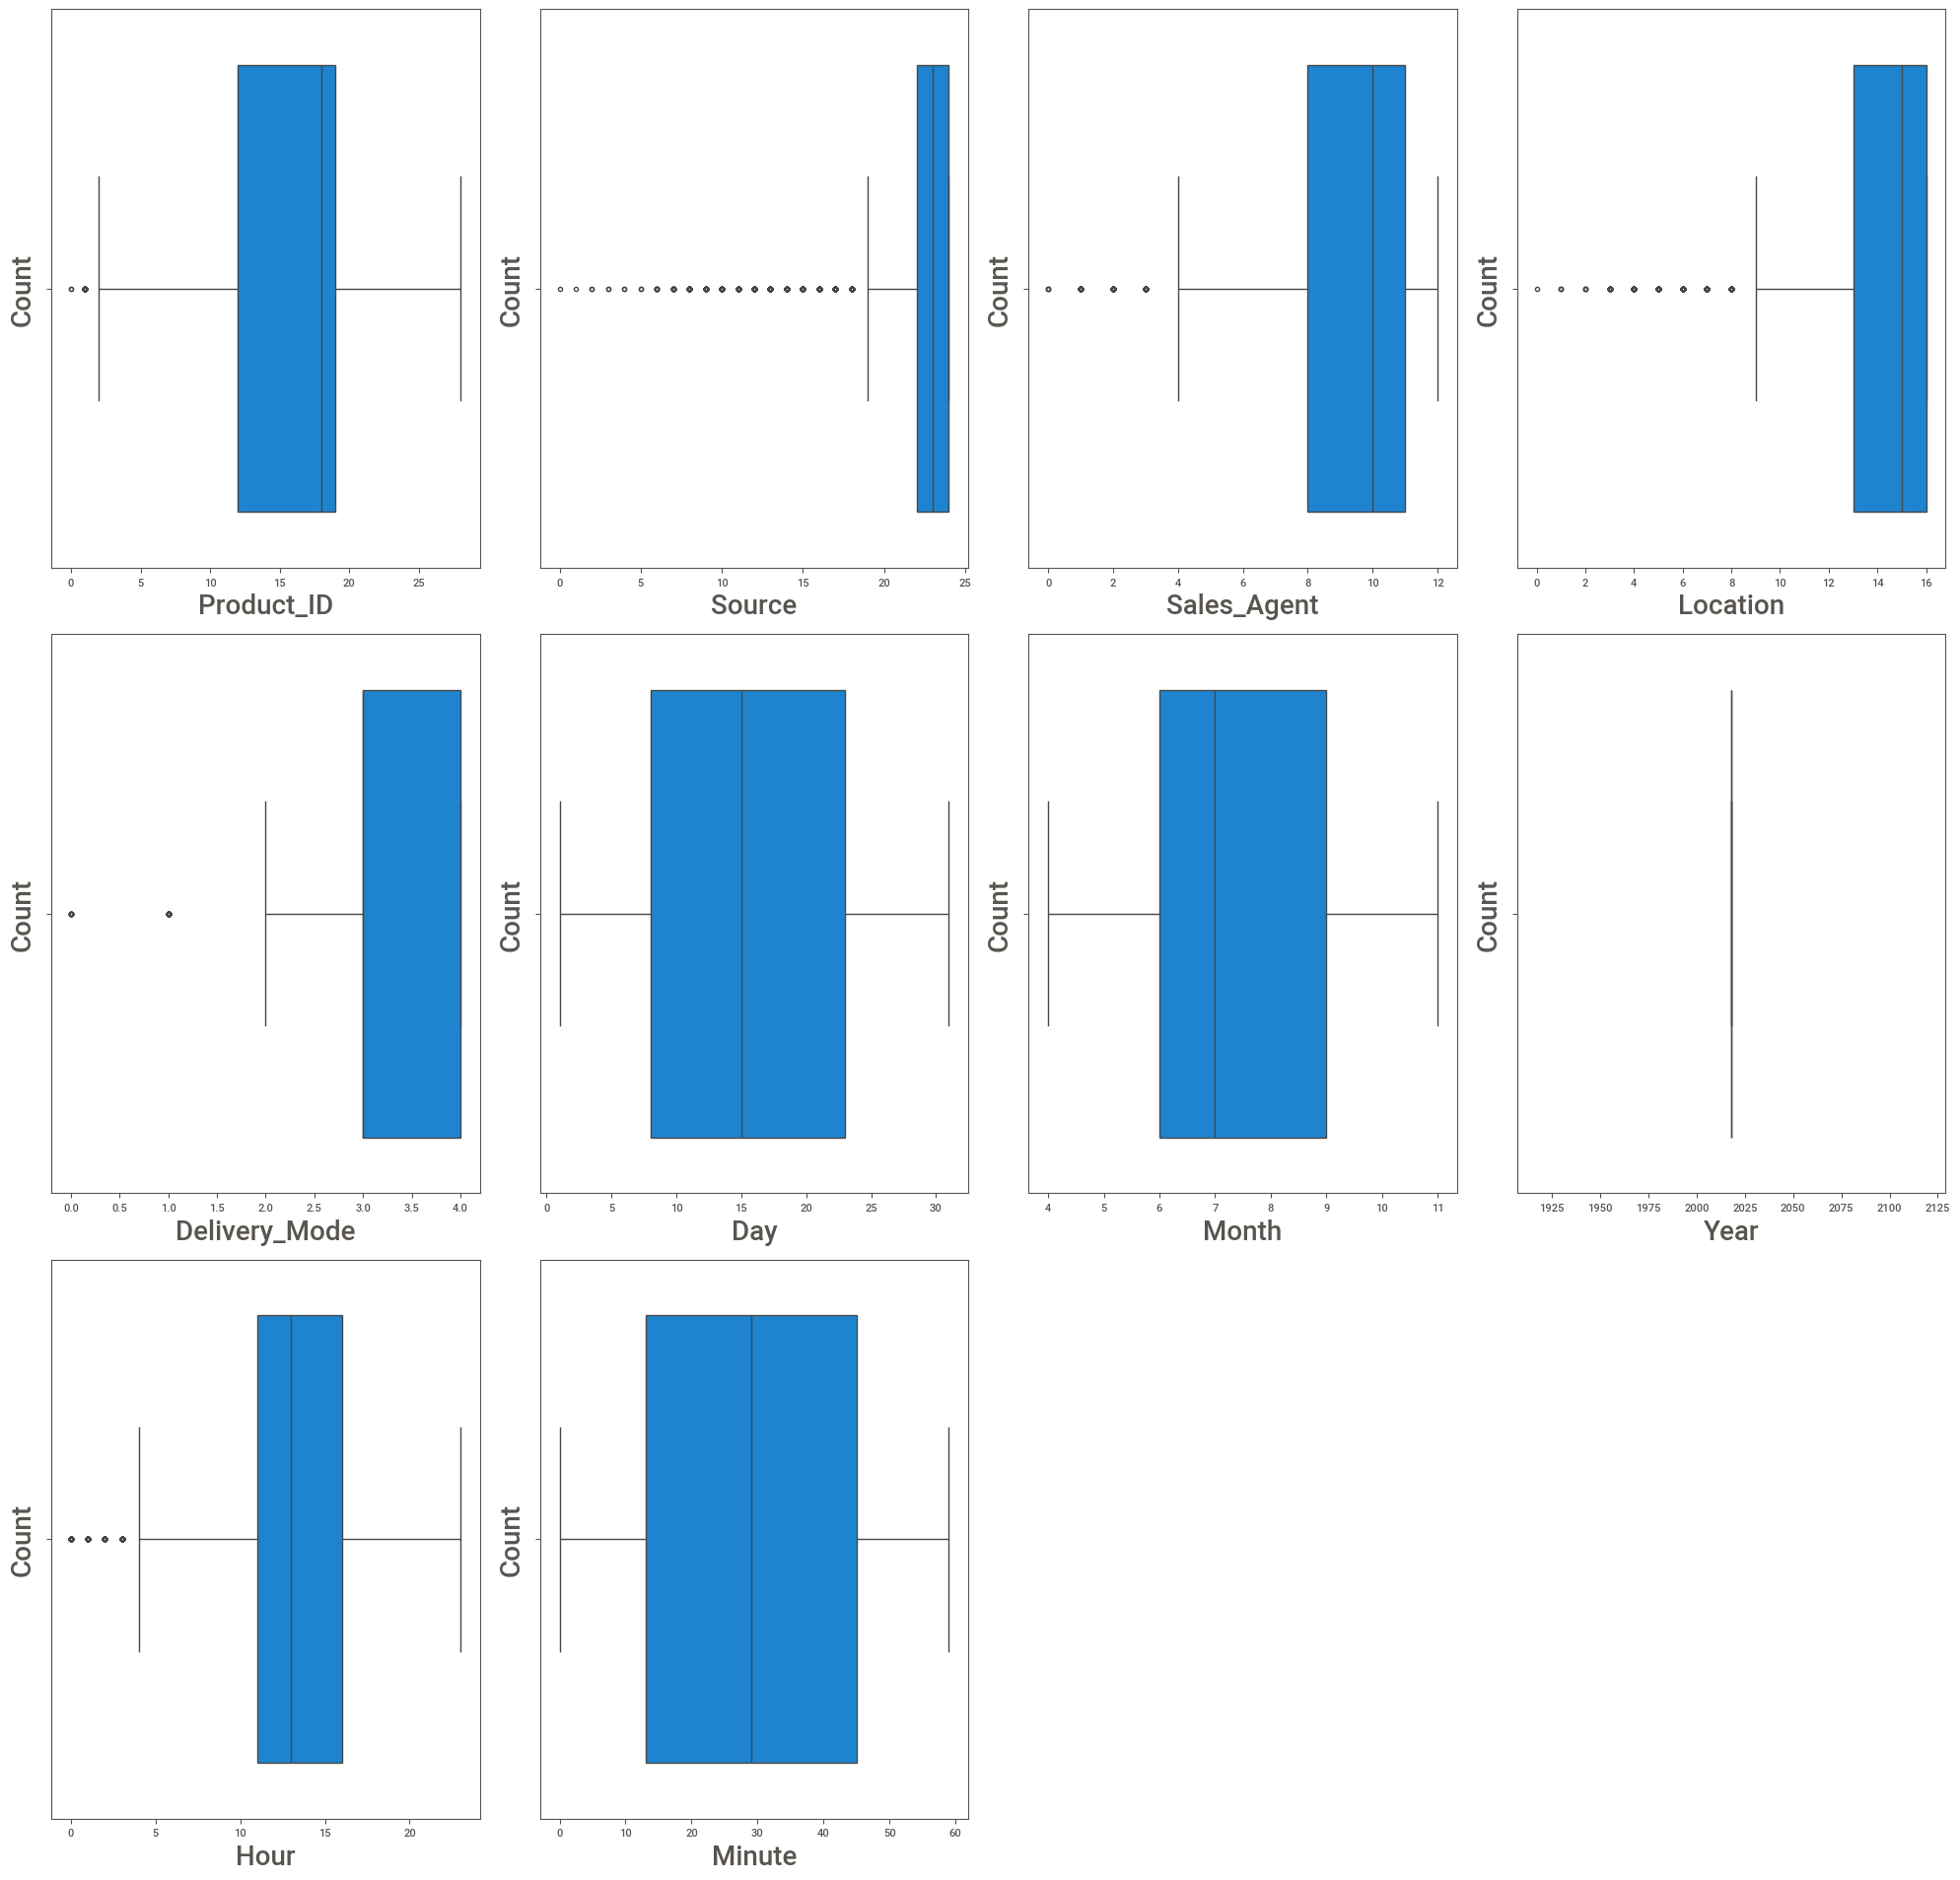

In [67]:
df2 = df[['Product_ID','Source','Sales_Agent','Location','Delivery_Mode','Day','Month','Year','Hour','Minute']]

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in df2:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(x=df2[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [68]:
# 1.) Product_ID
iqr=stats.iqr(df.Product_ID,interpolation='midpoint')
q1=df.Product_ID.quantile(0.25)
q3=df.Product_ID.quantile(0.75)
min_limit=q1-1.5*iqr
max_limit=q3+1.5*iqr
print('IQR =',iqr)
print('min_limit',min_limit)
print('max_limit',max_limit)

IQR = 7.0
min_limit 1.5
max_limit 29.5


In [69]:
len(df.loc[df['Product_ID']>max_limit])/len(df)*100

0.0

In [70]:
len(df.loc[df['Product_ID']<min_limit])/len(df)*100

1.446923597025017

In [71]:
df.loc[df['Product_ID']>max_limit]

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Year,Hour,Minute


In [72]:
df.loc[df['Product_ID']<min_limit]

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Year,Hour,Minute
272,1.0,22,8,15,3,0,5,11,2018,16,42
275,1.0,23,9,14,2,0,5,11,2018,15,41
423,1.0,19,8,10,2,0,31,10,2018,10,43
454,1.0,24,11,16,4,0,30,10,2018,11,6
581,1.0,21,10,13,2,1,26,10,2018,11,17
...,...,...,...,...,...,...,...,...,...,...,...
7112,1.0,22,8,14,3,0,5,5,2018,10,34
7138,1.0,23,8,15,3,0,4,5,2018,16,55
7151,1.0,23,6,14,3,0,4,5,2018,11,45
7283,1.0,24,11,16,4,0,2,5,2018,10,8


In [73]:
df.loc[df['Product_ID']<min_limit,'Product_ID']=np.median(df.Product_ID)

In [74]:
df.loc[df['Product_ID']<min_limit]

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Year,Hour,Minute


In [75]:
# 2.) Source
iqr=stats.iqr(df.Source,interpolation='midpoint')
q1=df.Source.quantile(0.25)
q3=df.Source.quantile(0.75)
min_limit=q1-1.5*iqr
max_limit=q3+1.5*iqr
print('IQR =',iqr)
print('min_limit',min_limit)
print('max_limit',max_limit)

IQR = 2.0
min_limit 19.0
max_limit 27.0


In [76]:
len(df.loc[df['Source']>max_limit])/len(df)*100

0.0

In [77]:
len(df.loc[df['Source']<min_limit])/len(df)*100

9.046653144016227

In [78]:
df.loc[df['Source']>max_limit]

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Year,Hour,Minute


In [79]:
df.loc[df['Source']<min_limit]

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Year,Hour,Minute
33,9.0,12,7,15,1,1,13,11,2018,14,11
56,9.0,18,9,14,3,1,13,11,2018,11,0
99,19.0,18,9,15,3,1,12,11,2018,12,7
106,5.0,9,9,16,2,0,11,11,2018,20,30
118,5.0,9,1,16,4,1,11,11,2018,12,35
...,...,...,...,...,...,...,...,...,...,...,...
7392,20.0,15,5,15,1,1,28,4,2018,18,32
7406,18.0,13,6,13,3,0,28,4,2018,13,20
7411,5.0,2,7,13,3,0,28,4,2018,11,35
7412,18.0,16,8,15,3,1,28,4,2018,11,25


In [80]:
df.loc[df['Source']<min_limit,'Source']=np.median(df.Source)

In [81]:
df.loc[df['Source']<min_limit]

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Year,Hour,Minute


In [82]:
# 3.) Sales_Agent 
iqr=stats.iqr(df.Sales_Agent,interpolation='midpoint')
q1=df.Sales_Agent.quantile(0.25)
q3=df.Sales_Agent.quantile(0.75)
min_limit=q1-1.5*iqr
max_limit=q3+1.5*iqr
print('IQR =',iqr)
print('min_limit',min_limit)
print('max_limit',max_limit)

IQR = 3.0
min_limit 3.5
max_limit 15.5


In [83]:
len(df.loc[df['Sales_Agent']>max_limit])/len(df)*100

0.0

In [84]:
len(df.loc[df['Sales_Agent']<min_limit])/len(df)*100

1.9202163624070319

In [85]:
df.loc[df['Sales_Agent']>max_limit]

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Year,Hour,Minute


In [86]:
df.loc[df['Sales_Agent']<min_limit]

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Year,Hour,Minute
1,18.0,22,2,16,4,1,14,11,2018,9,22
2,18.0,22,2,16,4,1,14,11,2018,9,21
3,18.0,22,2,16,4,1,14,11,2018,8,46
4,18.0,22,2,16,4,1,14,11,2018,7,34
5,18.0,22,2,16,4,1,14,11,2018,7,33
...,...,...,...,...,...,...,...,...,...,...,...
7160,19.0,24,3,12,3,0,4,5,2018,10,30
7204,18.0,23,3,14,3,0,3,5,2018,11,50
7219,15.0,23,3,16,3,0,3,5,2018,6,19
7323,15.0,22,3,16,3,0,30,4,2018,16,53


In [87]:
df.loc[df['Sales_Agent']<min_limit,'Sales_Agent']=np.median(df.Sales_Agent)

In [88]:
df.loc[df['Sales_Agent']<min_limit]

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Year,Hour,Minute


In [89]:
# 4.) Location 
iqr=stats.iqr(df.Location,interpolation='midpoint')
q1=df.Location.quantile(0.25)
q3=df.Location.quantile(0.75)
min_limit=q1-1.5*iqr
max_limit=q3+1.5*iqr
print('IQR =',iqr)
print('min_limit',min_limit)
print('max_limit',max_limit)

IQR = 3.0
min_limit 8.5
max_limit 20.5


In [90]:
len(df.loc[df['Location']>max_limit])/len(df)*100

0.0

In [91]:
len(df.loc[df['Location']<min_limit])/len(df)*100

3.367139959432049

In [92]:
df.loc[df['Location']>max_limit]

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Year,Hour,Minute


In [93]:
df.loc[df['Location']<min_limit]

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Year,Hour,Minute
24,18.0,22,11,8,3,1,13,11,2018,17,9
29,19.0,23,12,5,0,1,13,11,2018,15,50
30,19.0,23,12,5,1,0,13,11,2018,15,30
38,5.0,23,7,6,2,1,13,11,2018,12,50
47,19.0,23,12,8,4,0,13,11,2018,11,25
...,...,...,...,...,...,...,...,...,...,...,...
6773,19.0,23,12,5,3,1,14,5,2018,11,37
6888,18.0,21,8,4,3,0,10,5,2018,21,10
6945,27.0,21,10,5,2,1,9,5,2018,16,40
7096,18.0,23,12,4,3,1,5,5,2018,13,6


In [94]:
df.loc[df['Location']<min_limit,'Location']=np.median(df.Location)

In [95]:
df.loc[df['Location']<min_limit]

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Year,Hour,Minute


In [96]:
# 5.) Delivery_Mode 
iqr=stats.iqr(df.Delivery_Mode,interpolation='midpoint')
q1=df.Delivery_Mode.quantile(0.25)
q3=df.Delivery_Mode.quantile(0.75)
min_limit=q1-1.5*iqr
max_limit=q3+1.5*iqr
print('IQR =',iqr)
print('min_limit',min_limit)
print('max_limit',max_limit)

IQR = 1.0
min_limit 1.5
max_limit 5.5


In [97]:
len(df.loc[df['Delivery_Mode']>max_limit])/len(df)*100

0.0

In [98]:
len(df.loc[df['Delivery_Mode']<min_limit])/len(df)*100

1.7849898580121704

In [99]:
df.loc[df['Delivery_Mode']>max_limit]

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Year,Hour,Minute


In [100]:
df.loc[df['Delivery_Mode']<min_limit]

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Year,Hour,Minute
29,19.0,23,12,15,0,1,13,11,2018,15,50
30,19.0,23,12,15,1,0,13,11,2018,15,30
33,9.0,23,7,15,1,1,13,11,2018,14,11
39,19.0,23,12,12,1,1,13,11,2018,12,40
82,9.0,24,12,14,0,1,12,11,2018,14,13
...,...,...,...,...,...,...,...,...,...,...,...
7351,9.0,23,4,15,1,1,30,4,2018,14,0
7392,20.0,23,5,15,1,1,28,4,2018,18,32
7408,10.0,24,9,14,1,1,28,4,2018,12,44
7409,19.0,24,6,15,1,1,28,4,2018,12,19


In [101]:
df.loc[df['Delivery_Mode']<min_limit,'Delivery_Mode']=np.median(df.Delivery_Mode)

In [102]:
df.loc[df['Delivery_Mode']<min_limit]

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Year,Hour,Minute


In [103]:
# 6.) Hour 
iqr=stats.iqr(df.Hour,interpolation='midpoint')
q1=df.Hour.quantile(0.25)
q3=df.Hour.quantile(0.75)
min_limit=q1-1.5*iqr
max_limit=q3+1.5*iqr
print('IQR =',iqr)
print('min_limit',min_limit)
print('max_limit',max_limit)

IQR = 5.0
min_limit 3.5
max_limit 23.5


In [104]:
len(df.loc[df['Hour']>max_limit])/len(df)*100

0.0

In [105]:
len(df.loc[df['Hour']<min_limit])/len(df)*100

2.501690331304936

In [106]:
df.loc[df['Hour']>max_limit]

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Year,Hour,Minute


In [107]:
df.loc[df['Hour']<min_limit]

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Year,Hour,Minute
12,18.0,22,10,16,4,1,14,11,2018,2,37
159,15.0,22,7,10,4,1,10,11,2018,0,11
253,9.0,22,7,12,2,0,7,11,2018,2,7
261,18.0,22,7,15,2,0,6,11,2018,0,46
305,27.0,22,8,16,4,0,4,11,2018,2,5
...,...,...,...,...,...,...,...,...,...,...,...
7172,5.0,22,11,14,3,1,4,5,2018,0,38
7220,15.0,23,12,16,3,0,3,5,2018,0,41
7305,19.0,22,9,16,3,0,1,5,2018,3,47
7306,9.0,23,11,11,3,0,1,5,2018,1,15


In [108]:
df.loc[df['Hour']<min_limit,'Hour']=np.median(df.Hour)

In [109]:
df.loc[df['Hour']<min_limit]

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Year,Hour,Minute


In [110]:
df

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Year,Hour,Minute
0,18.0,22,11,16,4,1,14,11,2018,10,5
1,18.0,22,10,16,4,1,14,11,2018,9,22
2,18.0,22,10,16,4,1,14,11,2018,9,21
3,18.0,22,10,16,4,1,14,11,2018,8,46
4,18.0,22,10,16,4,1,14,11,2018,7,34
...,...,...,...,...,...,...,...,...,...,...,...
7417,9.0,24,4,11,3,0,28,4,2018,9,45
7418,15.0,24,5,16,4,0,28,4,2018,9,43
7419,5.0,23,11,15,3,0,28,4,2018,9,20
7420,21.0,23,12,16,3,0,28,4,2018,8,4


### Feature Selection
#### 1.) DROP UNIQUE AND CONSTANT COLUMN
* In this dataset total 4 unique column available(Month, Day, Hour and Minute) so i'm drop the Day, Hour and minute column column.

In [111]:
df.drop(['Day','Hour','Minute'],axis=1,inplace=True)

In [112]:
df

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Month,Year
0,18.0,22,11,16,4,1,11,2018
1,18.0,22,10,16,4,1,11,2018
2,18.0,22,10,16,4,1,11,2018
3,18.0,22,10,16,4,1,11,2018
4,18.0,22,10,16,4,1,11,2018
...,...,...,...,...,...,...,...,...
7417,9.0,24,4,11,3,0,4,2018
7418,15.0,24,5,16,4,0,4,2018
7419,5.0,23,11,15,3,0,4,2018
7420,21.0,23,12,16,3,0,4,2018


In [113]:
df.corr()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Month,Year
Product_ID,1.000000,-0.076456,0.022033,-0.028779,-0.045916,0.071841,0.008103,NaN
Source,-0.076456,1.000000,0.004670,0.117146,0.266820,0.002885,0.018986,NaN
Sales_Agent,0.022033,0.004670,1.000000,-0.078208,0.099784,-0.056859,0.102632,NaN
Location,-0.028779,0.117146,-0.078208,1.000000,0.197667,-0.074728,0.040477,NaN
Delivery_Mode,-0.045916,0.266820,0.099784,0.197667,1.000000,-0.144074,-0.087787,NaN
Status,0.071841,0.002885,-0.056859,-0.074728,-0.144074,1.000000,0.107442,NaN
Month,0.008103,0.018986,0.102632,0.040477,-0.087787,0.107442,1.000000,NaN
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


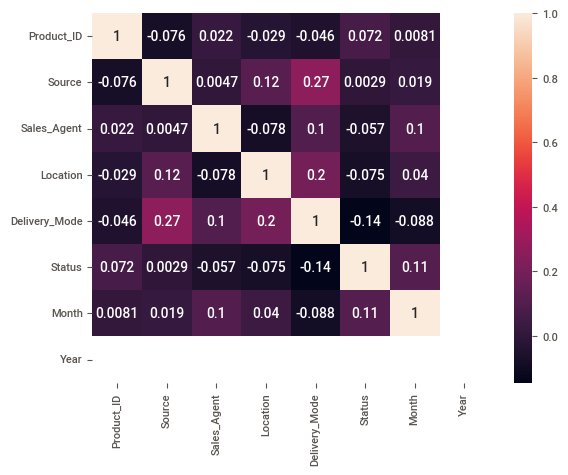

In [114]:
sns.heatmap(df.corr(),annot=True)
plt.show()

* No highly correlated feature available.

## MODEL CREATION

#### DEFINE INDEPENDANT AND DEPENDANT VERIABLE

In [115]:
X = df.drop(columns=['Status'])
y = df['Status']

In [116]:
X.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Month,Year
0,18.0,22,11,16,4,11,2018
1,18.0,22,10,16,4,11,2018
2,18.0,22,10,16,4,11,2018
3,18.0,22,10,16,4,11,2018
4,18.0,22,10,16,4,11,2018


In [117]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Status, dtype: int64

#### BALANCING THE TARGET COLUMN USING SMOTE

In [118]:
df.Status.value_counts()

Status
0    4467
1    2928
Name: count, dtype: int64

In [119]:
# balancing data
from collections import Counter
from imblearn.over_sampling import SMOTE
sm = SMOTE() #object creation
print("unbalanced data",Counter(y))
X_sm,y_sm = sm.fit_resample(X,y)
print('Balanced data',Counter(y_sm))

unbalanced data Counter({0: 4467, 1: 2928})
Balanced data Counter({1: 4467, 0: 4467})


#### SPLIT TRAINING AND TESTING DATA

In [120]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_sm,y_sm,test_size=0.2,random_state=42)

In [121]:
X_train.shape

(7147, 7)

In [122]:
X_test.shape

(1787, 7)

In [123]:
y_train.shape

(7147,)

In [124]:
y_test.shape

(1787,)

### 1.Logistic Regression

In [125]:
# Step:1 importing library
from sklearn.linear_model import LogisticRegression

# Step:2 Object creation
log_reg = LogisticRegression(random_state=5)

# Step:3 fitting the training data
log_reg.fit(X_train,y_train)

# Step:4 Prediction on test data
log_test_predict = log_reg.predict(X_test)

# Step:5 Prediction on training data
log_train_predict = log_reg.predict(X_train)

### EVALUATION
#### TRAINING ACCURACY

In [126]:
# Import library
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report,confusion_matrix
log_train_accuracy = accuracy_score(log_train_predict,y_train)
print("Training accuracy of Logistic regression model",log_train_accuracy*100)
print("Logistic regression training Classification report: \n",classification_report(log_train_predict,y_train))

Training accuracy of Logistic regression model 59.563453197145655
Logistic regression training Classification report: 
               precision    recall  f1-score   support

           0       0.62      0.59      0.61      3734
           1       0.57      0.60      0.58      3413

    accuracy                           0.60      7147
   macro avg       0.60      0.60      0.60      7147
weighted avg       0.60      0.60      0.60      7147



* Logistic regression model not perform well on training data.

#### TEST ACCURACY

In [127]:
log_test_accuracy = accuracy_score(log_test_predict,y_test)
print("Testing accuracy of Logistic regression model",log_test_accuracy*100)
print("Logistic regression testing Classification report: \n",classification_report(log_test_predict,y_test))

Testing accuracy of Logistic regression model 58.98153329602685
Logistic regression testing Classification report: 
               precision    recall  f1-score   support

           0       0.60      0.58      0.59       904
           1       0.58      0.60      0.59       883

    accuracy                           0.59      1787
   macro avg       0.59      0.59      0.59      1787
weighted avg       0.59      0.59      0.59      1787



* Logistic regression model also not perform well on testing data

### 2.KNeighboursClassifier

In [128]:
# Step:1 Taking the optimal value of k
from sklearn.neighbors import KNeighborsClassifier
error_rate = [] # Creating empty list
for i in range(2,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_knn_predict = knn.predict(X_test)
    error_rate.append(np.mean(y_knn_predict != y_test))
print("Error rate:",error_rate)

Error rate: [0.32120872971460546, 0.2949076664801343, 0.3060996082820369, 0.2926692781197538, 0.28875209848908784, 0.2965864577504197, 0.3005036373810856, 0.29043088975937326, 0.3010632344711808]


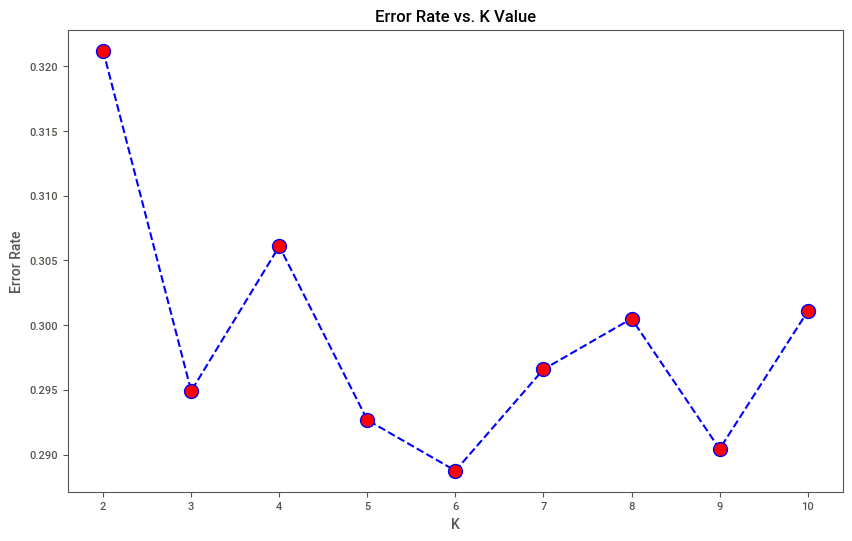

In [129]:
# Step:2 Plotting the error rate
plt.figure(figsize=(10,6))
plt.plot(range(2,11),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [130]:
# Step:3 Get nearest neighbors
knn1 = KNeighborsClassifier(n_neighbors=4)

# Step:4 Fitting the training data
knn1.fit(X_train,y_train)

# Step:5 Prediction on testing data
knn_test_predict = knn1.predict(X_test)

# Step:6 Prediction on training data
knn_train_predict = knn1.predict(X_train)


### EVALUATION
#### TRAINING ACCURACY

In [131]:
knn_train_accuracy = accuracy_score(y_train,knn_train_predict)
print("Training accuracy of knn model ",knn_train_accuracy*100)
print("Training classification report:\n",classification_report(knn_train_predict,y_train))

Training accuracy of knn model  79.96362109976214
Training classification report:
               precision    recall  f1-score   support

           0       0.87      0.76      0.81      4106
           1       0.73      0.85      0.78      3041

    accuracy                           0.80      7147
   macro avg       0.80      0.81      0.80      7147
weighted avg       0.81      0.80      0.80      7147



* KNN claaifier model is slightly perform well on training data

#### TESTING ACCURACY

In [132]:
knn_test_accuracy = accuracy_score(y_test,knn_test_predict)
print("Testing accuracy of knn model",knn_test_accuracy*100)
print("Testing classification report: \n",classification_report(y_test,knn_test_predict))

Testing accuracy of knn model 69.3900391717963
Testing classification report: 
               precision    recall  f1-score   support

           0       0.67      0.74      0.70       869
           1       0.72      0.65      0.69       918

    accuracy                           0.69      1787
   macro avg       0.70      0.70      0.69      1787
weighted avg       0.70      0.69      0.69      1787



* But testing score is still lagging so i apply bagging

#### USE BAGGING ON KNEIGHBOURS CLASSIFIER

In [133]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [134]:
# Create your KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Initialize the BaggingClassifier with the new parameter name
bagg = BaggingClassifier(estimator=knn, n_estimators=50)

# Fit and use the classifier as usual
bagg.fit(X_train, y_train)
bagg_predict = bagg.predict(X_test)

#### EVALUATION

In [135]:
bagg_accuracy = accuracy_score(y_test,bagg_predict)
print("Score after bagging:",bagg_accuracy*100)

Score after bagging: 72.3559037493005


* After apply bagging score is slightly improve

### 3.Decision Tree 

In [136]:
# Step:1 Importing library and object creation
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

# Step:2 fitting training data
dtc.fit(X_train,y_train)

# Step:3 Prediction on test data
dtc_test_predict = dtc.predict(X_test)

# Step:4 Prediction on training data
dtc_train_predict = dtc.predict(X_train)

### EVALUATION
#### TRAINING ACCURACY

In [137]:
dtc_train_accuracy = accuracy_score(y_train,dtc_train_predict)
print("Training accuracy of Decision tree classifier:",dtc_train_accuracy*100)
print("classification report of training:"'\n',classification_report(y_train,dtc_train_predict))

Training accuracy of Decision tree classifier: 90.28963201343221
classification report of training:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91      3598
           1       0.92      0.88      0.90      3549

    accuracy                           0.90      7147
   macro avg       0.90      0.90      0.90      7147
weighted avg       0.90      0.90      0.90      7147



* Decision tree classifier well train on training data

#### TESTING ACCURACY

In [138]:
dtc_test_accuracy = accuracy_score(y_test,dtc_test_predict)
print("Training accuracy of Decision tree classifier:",dtc_test_accuracy*100)
print("classification report of training:"'\n',classification_report(y_test,dtc_test_predict))

Training accuracy of Decision tree classifier: 69.55791829882484
classification report of training:
               precision    recall  f1-score   support

           0       0.69      0.68      0.69       869
           1       0.70      0.71      0.70       918

    accuracy                           0.70      1787
   macro avg       0.70      0.70      0.70      1787
weighted avg       0.70      0.70      0.70      1787



* But Not perform well on testing data so I apply hyperparameter tunning

#### HYPER PARAMETER TUNNING

In [139]:
# Step:1 importing library
from sklearn.model_selection import GridSearchCV

# Step:2 Tunning the parameter
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 30))), 
    "min_samples_split":[2, 3, 4,5], 
    "min_samples_leaf":list(range(1, 10)), 
}


tree_c = DecisionTreeClassifier(random_state=3)
tree_cv = GridSearchCV(tree_c, params, scoring="f1", n_jobs=-1, verbose=2, cv=3)

# Fitting training data
tree_cv.fit(X_train,y_train)

# Get the best parameter
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params}")

Fitting 3 folds for each of 4176 candidates, totalling 12528 fits
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gin

In [140]:
# Step:3 Place the parameter on the decision tree classifier
dt1=DecisionTreeClassifier(criterion='gini',
                           max_depth=5,min_samples_leaf=7,
                           min_samples_split=2,splitter='best')

In [141]:
# Step:4 fitting training data
dt1.fit(X_train,y_train)

# Step:5 prediction on testing data
yhat = dt1.predict(X_test)

#### EVALUATION

In [142]:
dt1_test_accuracy = accuracy_score(y_test,yhat)
print("Accuracy score:",dt1_test_accuracy*100)
print("Classification report:"'\n',classification_report(y_test,yhat))

Accuracy score: 64.6894236149972
Classification report:
               precision    recall  f1-score   support

           0       0.69      0.50      0.58       869
           1       0.62      0.79      0.70       918

    accuracy                           0.65      1787
   macro avg       0.66      0.64      0.64      1787
weighted avg       0.66      0.65      0.64      1787



* Score decreased after hyper-parameter tunning

In [143]:
from sklearn.model_selection import KFold, cross_val_score

# Create a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Perform k-fold cross-validation
k_folds = KFold(n_splits=5)
scores = cross_val_score(clf, X, y, cv=k_folds)

# Print cross-validation scores
print("Cross Validation Scores:", scores)
print("Average CV Score:", scores.mean())
print("Number of CV Scores used in Average:", len(scores))


Cross Validation Scores: [0.6091954  0.61933739 0.67545639 0.62474645 0.59296822]
Average CV Score: 0.6243407707910751
Number of CV Scores used in Average: 5


### 4.Random Forest Classifier

In [144]:
# Step:1 import library and object creation
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

# Step:2 fitting the training data
rf.fit(X_train,y_train)

# Step:3 Prediction on test data
rf_test_predict = rf.predict(X_test)

# Step:4 Prediction on training data
rf_train_predict = rf.predict(X_train)

### EVALUATION
#### TRAINING ACCURACY

In [145]:
rf_train_accuracy = accuracy_score(y_train,rf_train_predict)
print("Training accuracy of random forest classifier:",rf_train_accuracy*100)
print("Classification report of training:"'\n',classification_report(y_train,rf_train_predict))

Training accuracy of random forest classifier: 90.28963201343221
Classification report of training:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      3598
           1       0.89      0.91      0.90      3549

    accuracy                           0.90      7147
   macro avg       0.90      0.90      0.90      7147
weighted avg       0.90      0.90      0.90      7147



* Random forest model well train on training data.

#### TESTING ACCURACY

In [146]:
rf_test_accuracy = accuracy_score(y_test,rf_test_predict)
print("Testing accuracy of random forest classifier:",rf_test_accuracy*100)
print("Classification report of training:"'\n',classification_report(y_test,rf_test_predict))

Testing accuracy of random forest classifier: 71.46054840514829
Classification report of training:
               precision    recall  f1-score   support

           0       0.72      0.67      0.70       869
           1       0.71      0.76      0.73       918

    accuracy                           0.71      1787
   macro avg       0.72      0.71      0.71      1787
weighted avg       0.72      0.71      0.71      1787



* But not perform well on testing side so i need to apply hyperparmeter tunning

#### HYPER PARAMETER TUNNING

In [147]:
# Step:1 [imutation of parameter]
from sklearn.model_selection import RandomizedSearchCV
# not used grid search cv because memory reason

n_estimators = [int(x) for x in np.linspace(start=100, stop=2000, num=10)]
max_features = ['auto', 'sqrt'] ### auto - select randomly, sqrt - 
max_depth = [int(x) for x in np.linspace(10, 110, num=10)] ### level in the tree
max_depth.append(None)
min_samples_split = [2, 5, 15]
min_samples_leaf = [1, 2, 4]


# Step:2 make a dictionary of parameter
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

# Step:3 Object creation
rf_clf1 = RandomForestClassifier(random_state=42) 
# provide random state because select row and column randomly


# Step:4 randomized search cv with parameter
rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=3, random_state=42, n_jobs=-1)


# Step:5 fitting the training data
rf_cv.fit(X_train, y_train)

# Step:6 Getting the best parameter
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END criterion=entropy, max_depth=23, min_samples_leaf=5, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=23, min_samples_leaf=5, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=23, min_samples_leaf=5, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=24, min_samples_leaf=7, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=24, min_samples_leaf=7, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=24, min_samples_leaf=7, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=24, min_samples_leaf=7, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=24, min_samples_leaf=7, min_samples_split=2, splitter=random; total time=   

In [148]:
# Step:7 
rf_clf2 = RandomForestClassifier(**rf_best_params)

# Step:8 Fitting the training data
rf_clf2.fit(X_train,y_train)

# Step:9 Prediction on test data
y_predict = rf_clf2.predict(X_test)

#### EVALUATION

In [149]:
test_accuracy = accuracy_score(y_test,y_predict)
print("Testing accuracy after hyper parameter tunning:",test_accuracy*100)

Testing accuracy after hyper parameter tunning: 71.1247901510912


* Random forest testing score is slightly improve after hyper parameter tunning.

### 5.Gradient Boosting Classifier

In [150]:
# Step:1 Object cretion
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(learning_rate=0.1,n_estimators=150,random_state=42)

# Step:2 fitting the training data
gbm.fit(X_train,y_train) ## fitting the data

# Step:3 prediction on test data
gbm_test_predict=gbm.predict(X_test)

# Step:4 Prediction on train data
gbm_train_predict = gbm.predict(X_train)

### EVALUATION
#### TRAINING ACCURACY

In [151]:
gbm_train_accuracy = accuracy_score(y_train,gbm_train_predict)
print("Grediant boosting classifier training accuracy:",gbm_train_accuracy*100)
print("Classification report of training:"'\n',classification_report(y_train,gbm_train_predict))

Grediant boosting classifier training accuracy: 73.27550020987827
Classification report of training:
               precision    recall  f1-score   support

           0       0.76      0.69      0.72      3598
           1       0.71      0.78      0.74      3549

    accuracy                           0.73      7147
   macro avg       0.73      0.73      0.73      7147
weighted avg       0.74      0.73      0.73      7147



#### TESTING ACCURACY

In [152]:
gbm_test_accuracy = accuracy_score(y_test,gbm_test_predict)
print("Grediant boosting classifier testing accuracy:",gbm_test_accuracy*100)
print("Classification report of testing:"'\n',classification_report(y_test,gbm_test_predict))

Grediant boosting classifier testing accuracy: 70.06155567991047
Classification report of testing:
               precision    recall  f1-score   support

           0       0.72      0.63      0.67       869
           1       0.69      0.76      0.72       918

    accuracy                           0.70      1787
   macro avg       0.70      0.70      0.70      1787
weighted avg       0.70      0.70      0.70      1787



### 6.XGB Classifier

In [153]:
# Step:1 import library and object creation
import xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier()

# Step:2 Fitting the training data
xgb.fit(X_train,y_train)

# Step:3 Prediction on training data
xgb_train_predict = xgb.predict(X_train)

# Step:4 Prediction on testing data
xgb_test_predict = xgb.predict(X_test)

### EVALUATION
#### TRAINING ACCURACY

In [154]:
xgb_train_accuracy = accuracy_score(xgb_train_predict,y_train)
print("Training accuracy of xgb model",xgb_train_accuracy*100)
print("Classifiaction report on training: \n",classification_report(xgb_train_predict,y_train))

Training accuracy of xgb model 82.8319574646705
Classifiaction report on training: 
               precision    recall  f1-score   support

           0       0.81      0.85      0.83      3435
           1       0.85      0.81      0.83      3712

    accuracy                           0.83      7147
   macro avg       0.83      0.83      0.83      7147
weighted avg       0.83      0.83      0.83      7147



#### TEST ACCURACY

In [155]:
xgb_test_accuracy = accuracy_score(xgb_test_predict,y_test)
print("Testing accuracy of xgb model",xgb_test_accuracy*100)
print("Classification report on testing: \n",classification_report(xgb_test_predict,y_test))

Testing accuracy of xgb model 70.28539451594852
Classification report on testing: 
               precision    recall  f1-score   support

           0       0.64      0.72      0.68       776
           1       0.76      0.69      0.72      1011

    accuracy                           0.70      1787
   macro avg       0.70      0.70      0.70      1787
weighted avg       0.71      0.70      0.70      1787



#### HYPER PARAMETER TUNNING

In [156]:
# Step:1 import library 
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.001,0.01,0.1, 0.03, 0.06, 0.1, 0.15, 0.02,0.003, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [3,5,6,7,8,10],
              'n_estimators': [50,65,80,100,130,150],
              'reg_alpha': [0,0.01,0.1,0.02,0.2,0.4,0.8,1.6,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.01,0.1,0.02,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

# Step:2 Object creation with parameter
XGB = XGBClassifier(random_state=42)

# Step:3 Create randomized search cv with parameter
rcv = RandomizedSearchCV(estimator=XGB,scoring='f1',param_distributions=param_grid,n_iter=150,
                        cv=5,verbose=3,random_state=5,n_jobs=-1)

# Step:4 Fitting training data on randomized search cv
rcv.fit(X_train,y_train)

# Step:5 Get best parameters
rcv_best_parameter = rcv.best_params_
print(f"Best parameter: {rcv_best_parameter}")


Fitting 5 folds for each of 150 candidates, totalling 750 fits
[CV] END criterion=entropy, max_depth=23, min_samples_leaf=2, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=23, min_samples_leaf=2, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=23, min_samples_leaf=2, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=23, min_samples_leaf=2, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=23, min_samples_leaf=2, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=23, min_samples_leaf=2, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=23, min_samples_leaf=2, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=24, min_samples_leaf=3, min_samples_split=2, splitter=best; total time= 

In [157]:
# Step:6 Place the best parameter
XGB2 = XGBClassifier(reg_lambda=0,reg_alpha=0.1,n_estimators=80,max_depth=7,learning_rate=0.1,gamma=0.8)

# Step:7 Fitting the training data
XGB2.fit(X_train,y_train)

# Step:8 Prediction on testing data
XGB_prediction = XGB2.predict(X_test)

In [158]:
XGB_accuracy = accuracy_score(XGB_prediction,y_test)
print("Accuracy score after hyperparameter tunning",XGB_accuracy*100)
print("Classification report: \n",classification_report(XGB_prediction,y_test))

Accuracy score after hyperparameter tunning 70.56519306099608
Classification report: 
               precision    recall  f1-score   support

           0       0.64      0.72      0.68       777
           1       0.76      0.69      0.73      1010

    accuracy                           0.71      1787
   macro avg       0.70      0.71      0.70      1787
weighted avg       0.71      0.71      0.71      1787



* After hyper-parameter tunning score is same.

### 7.Artifial Neural Network

In [159]:
# Step:1 Importing library and object creation
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(50,2),
                      learning_rate='constant',
                      max_iter=1000,
                      random_state=45)

# Step:2 Fitting the training data
model.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(50, 2), max_iter=1000, random_state=45)

In [160]:
# Step:3 Predicting the probability
mlp_prdict_probability = model.predict_proba(X_test)
mlp_prdict_probability

array([[0.5031667 , 0.4968333 ],
       [0.50071327, 0.49928673],
       [0.49842153, 0.50157847],
       ...,
       [0.50023958, 0.49976042],
       [0.50067756, 0.49932244],
       [0.49912852, 0.50087148]])

In [161]:
# Step:4 Prediction on test data
mlp_test_predict = model.predict(X_test)

# Step:5 Prediction on training data
mlp_train_predict = model.predict(X_train)

#### TRAINING ACCURACY

In [162]:
mlp_train_accuracy = accuracy_score(mlp_train_predict,y_train)
print("Training accuracy of MLP model is:",mlp_train_accuracy*100)
print("Classification report of training:"'\n',classification_report(mlp_train_predict,y_train))

Training accuracy of MLP model is: 58.73793199944033
Classification report of training:
               precision    recall  f1-score   support

           0       0.48      0.62      0.54      2777
           1       0.70      0.57      0.63      4370

    accuracy                           0.59      7147
   macro avg       0.59      0.59      0.58      7147
weighted avg       0.61      0.59      0.59      7147



#### TESTING ACCURACY

In [163]:
mlp_test_accuracy = accuracy_score(mlp_test_predict,y_test)
print("Testing accuracy of MLP model is:",mlp_test_accuracy*100)
print("Classification report of testing:"'\n',classification_report(mlp_test_predict,y_test))

Testing accuracy of MLP model is: 56.57526580861779
Classification report of testing:
               precision    recall  f1-score   support

           0       0.44      0.57      0.50       669
           1       0.69      0.56      0.62      1118

    accuracy                           0.57      1787
   macro avg       0.56      0.57      0.56      1787
weighted avg       0.59      0.57      0.57      1787



* ANN model not perform well on training as well as testing data

### CONCLUSION
* From the above models I select the Random Forest classifier because this model performs well in training and testing.

### MODEL SAVING

In [164]:
import pickle

file = open('project_sales_pred.pkl','wb')
pickle.dump(rf,file)

[CV] END criterion=entropy, max_depth=28, min_samples_leaf=7, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=28, min_samples_leaf=7, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=28, min_samples_leaf=7, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=28, min_samples_leaf=7, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=28, min_samples_leaf=7, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=28, min_samples_leaf=7, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=28, min_samples_leaf=7, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=28, min_samples_leaf=7, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=28, min_samples_leaf